<a href="https://colab.research.google.com/github/Suhaila-Hassan/Credit-Card-Customers-Segmentation/blob/main/Credit_Card_Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set()
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

# About Dataset

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Data Dictionary for Credit Card dataset :-

- **CUST_ID :** Identification of Credit Card holder
- **BALANCE :** Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY :** How frequently the Balance is updated
- **PURCHASES :** Amount of purchases made from account
- **ONEOFF_PURCHASES :** Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES :** Amount of purchase done in installment
- **CASH_ADVANCE :** Cash in advance given by the user
- **PURCHASES_FREQUENCY :** How frequently the Purchases are being made
- **ONEOFF_PURCHASES_FREQUENCY :** How frequently Purchases are happening in one-go
- **PURCHASES_INSTALLMENTS_FREQUENCY :** How frequently purchases in installments are being done
- **CASH_ADVANC_EFREQUENCY :** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX :** Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX :** Number of purchase transactions made
- **CREDIT_LIMIT :** Limit of Credit Card for user
- **PAYMENTS :** Amount of Payment done by user
- **MINIMUM_PAYMENTS :** Minimum amount of payments made by user
- **PRC_FULL_PAYMENT :** Percent of full payment paid by user
- **TENURE :** Tenure of credit card service for user

# Load Dataset

Download dataset from Kaggle

In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("arjunbhasin2013/ccdata")
dataset_dir = os.path.join(path, 'CC GENERAL.csv')

In [3]:
df = pd.read_csv(dataset_dir)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Data Exploration

## Data Info & Statistical Description

In [4]:
df.shape

(8950, 18)

Dataset contains 8950 records and 18 features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Our dataset contains a single categorical feature (CUST_ID) and the rest is numerical (integers and floats)

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

Notes from Statistical Description:
1. Many features in dataset have a high standard deviation.
2. Most customers prefer a 12-months tenure
3. CASH_ADVANCE_FREQUENCY feature has values exceeding 1 set for max frequency in other frequency columns


## Check for Missing Values

In [7]:
nulls_df = pd.DataFrame({'Missing Values': df.isnull().sum(),
                        'Percentage': round(df.isnull().mean() * 100, 2)})
nulls_df.sort_values(by='Missing Values', ascending=False)

Missing Values  Percentage
MINIMUM_PAYMENTS                             313        3.50
CREDIT_LIMIT                                   1        0.01
BALANCE                                        0        0.00
CUST_ID                                        0        0.00
BALANCE_FREQUENCY                              0        0.00
PURCHASES                                      0        0.00
CASH_ADVANCE                                   0        0.00
PURCHASES_FREQUENCY                            0        0.00
ONEOFF_PURCHASES                               0        0.00
INSTALLMENTS_PURCHASES                         0        0.00
PURCHASES_INSTALLMENTS_FREQUENCY               0        0.00
ONEOFF_PURCHASES_FREQUENCY                     0        0.00
CASH_ADVANCE_TRX                               0        0.00
CASH_ADVANCE_FREQUENCY                         0        0.00
PURCHASES_TRX                                  0        0.00
PAYMENTS                                       0        0.00
PRC_FULL_PAYMENT                               0        0.00
TENURE                                         0        0.00

Most missing values found in dataset exist in MINIMUM_PAYMENTS column with 3.5% of values missing.

Only 1 record contains a missing CREDIT_LIMIT value

## Check for Duplicates

In [8]:
duplicate_records = df.duplicated().sum()
duplicate_ids = df['CUST_ID'].duplicated().sum()
print(f'Number of Duplicate Records: {duplicate_records}')
print(f'Number of Duplicate Customer IDs: {duplicate_ids}')

Number of Duplicate Records: 0
Number of Duplicate Customer IDs: 0


No duplicate records were found and each customer has one record in dataset.

## Initial Data Analysis

### Features Correlation

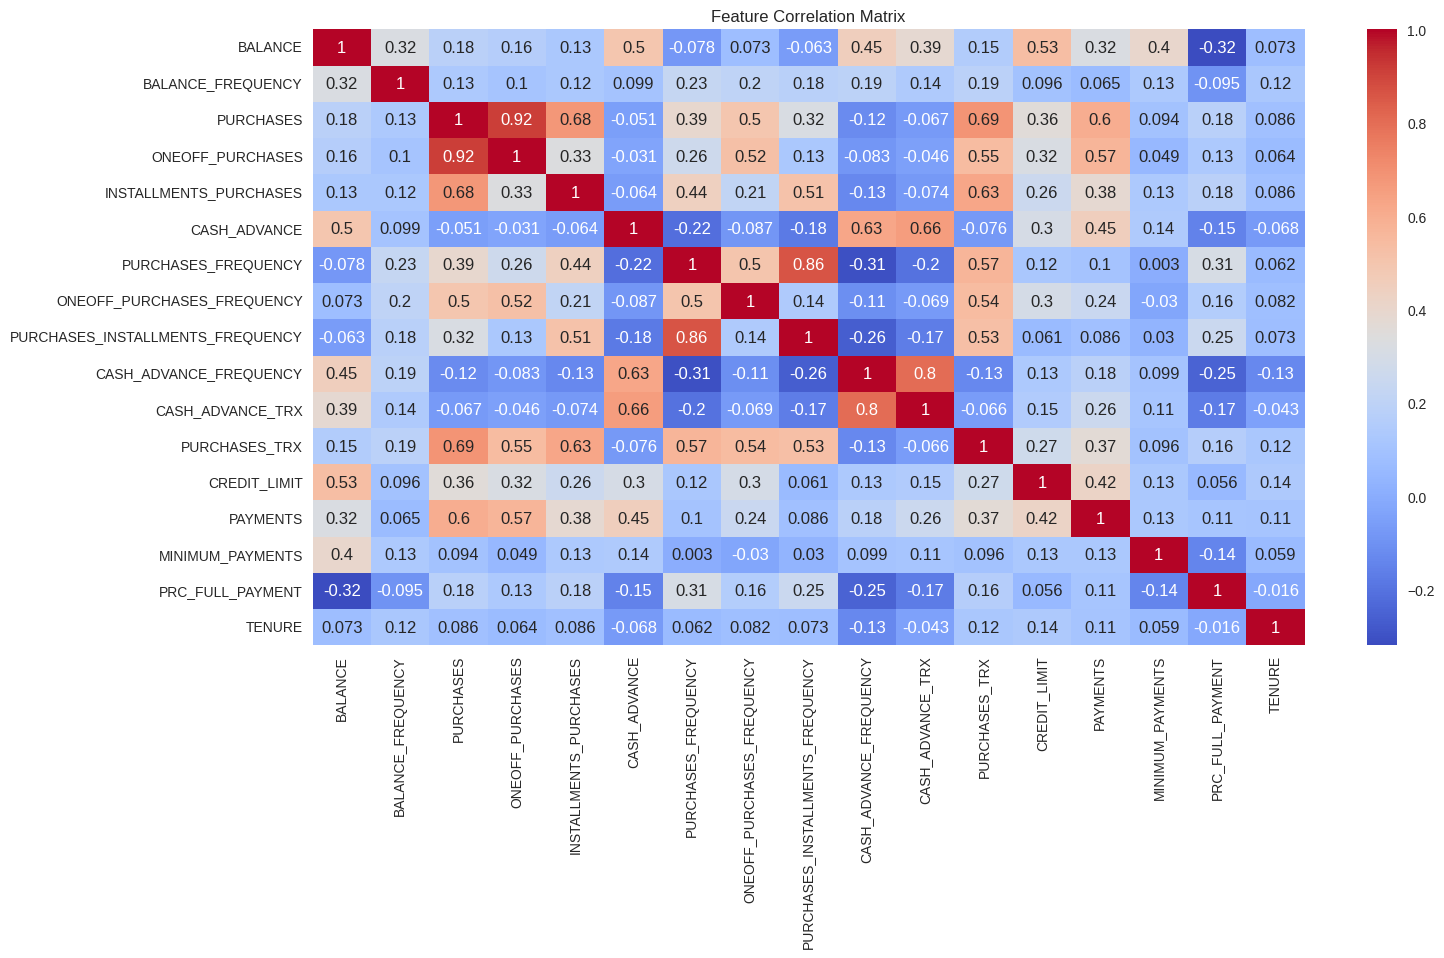

In [9]:
numeric_features = df.select_dtypes(include=np.number)
features_corr = numeric_features.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(features_corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

Features with highest correlations are:
1. PURCHASES - ONEOFF_PURCHASES: 0.92
2. PURCHASES_FREQUENCY - PURCHASES_INSTALLEMENTS_FREQUENCY: 0.86
3. CASH_ADVANCE_TRX - CASH_ADVANCE_FREQUENCY: 0.8
4. PURCHASES - PURCHASES_TRX: 0.69
5. PURCHASES - INSTALLEMENTS_PURCHASES: 0.68

### Features Distribution

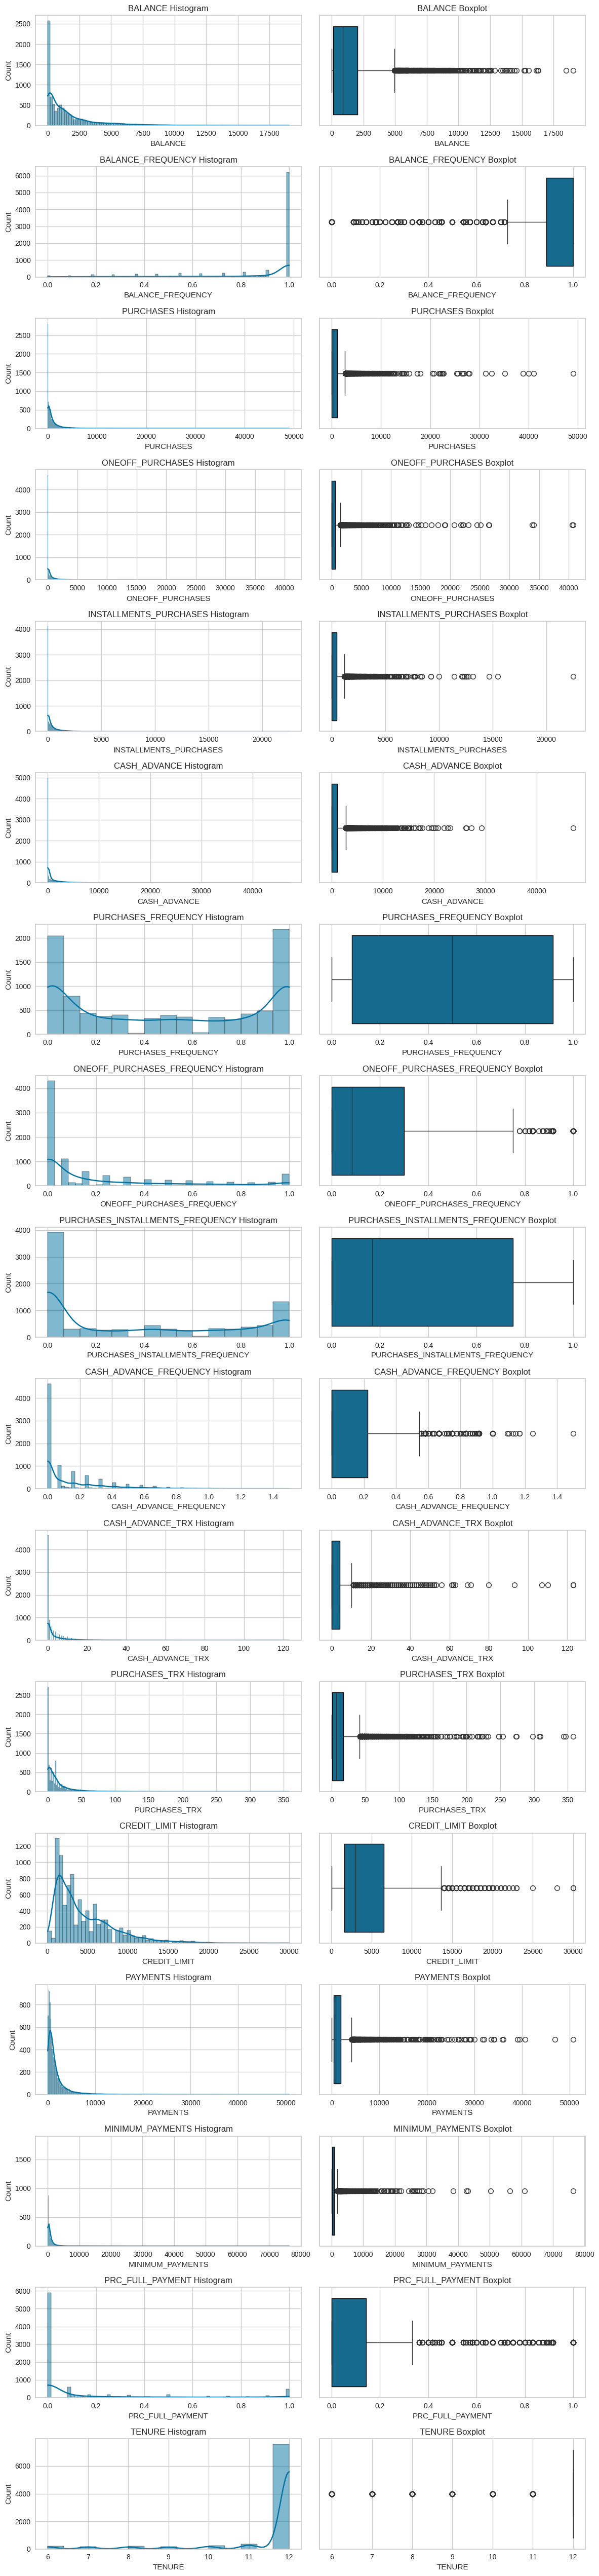

In [10]:
features = df.drop('CUST_ID', axis=1).columns
n_features = len(features)

plt.figure(figsize=(12, n_features * 3))
for i, col in enumerate(features):

    plt.subplot(n_features, 2, 2*i + 1)
    sns.histplot(df[col], kde=True, edgecolor='black')
    plt.title(f'{col} Histogram')

    plt.subplot(n_features, 2, 2*i + 2)
    sns.boxplot(x=df[col], boxprops={'edgecolor': 'black'})
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

* Balance: Many customers have a balance 0.0 and most customers balance don't exceed 2500.
* Balance Frequency: Vast majority of customers update their balance frequently.
* Purchases: Most customers purchases don't exceed 2000.
* One-off Purchases & Installment Purchases: Most one-off purchases and installment purchases made by customers are less than 2000, with many having a one-off and installment purchase of 0.
* Cash Advance: Many customers have cash advance of 0, with most not exceeding 2000.
* Purchases Frequency: Equal number of customers either have a frequency of 0 or 1, with the rest scattered between 0 and 1.
* One-off Purchases Frequency & Purchases Installments Frequenct: Many customers have a frequency 0.
* Cash Advance Frequency and TRX: Most are of value 0.
* Purchases Trx: Many customers made 0 transactions. Most didn't make more than 25.
* Credit Limit: Most customers credit limit lies between 0 and 10000.
* Payments: Most customer payments don't exceed 2000.
* Minimum Payments: Don't exceed 2000.
* Prc Full Payment: Most customer have a payment percent of 0 and the percentage for many don't go beyond 20%.
* Tenure: Most customers prefer 12-months tenure.




# Data Preprocessing

## Drop Features

Drop **CUST_ID** column and keep the numerical features for clustering

In [11]:
df.drop('CUST_ID', axis=1, inplace=True)

## Handle Missing Values

Fill missing CREDIT_LIMIT value with column median

In [12]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [13]:
total_rows = len(df)
before_less_equal = (df['MINIMUM_PAYMENTS'] <= df['PAYMENTS']).sum()
before_greater = (df['MINIMUM_PAYMENTS'] > df['PAYMENTS']).sum()
percent_before_less_equal = (before_less_equal / total_rows) * 100
percent_before_greater = (before_greater / total_rows) * 100

comparison_df = pd.DataFrame({
    'Condition': ['MINIMUM_PAYMENTS <= PAYMENTS', 'MINIMUM_PAYMENTS > PAYMENTS'],
    'Count Before': [before_less_equal, before_greater],
    'Percentage Before': [percent_before_less_equal, percent_before_greater]
})

comparison_df['Percentage Before'] = comparison_df['Percentage Before'].round(2)
comparison_df

Condition  Count Before  Percentage Before
0  MINIMUM_PAYMENTS <= PAYMENTS          6272              70.08
1   MINIMUM_PAYMENTS > PAYMENTS          2365              26.42

On checking if there are records with MINIMUM_PAYMENTS > PAYMENTS, we find their percentage to be 26% of all records.

For filling missing values in MINIMUM_PAYMENTS column:
if the PAYMENTS column has value zero the MINIMUM_PAYMENTS is zero, else fill missing values with MINIMUM_PAYMENTS median.

In [14]:
df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'].fillna(0, inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [15]:
after_less_equal = (df['MINIMUM_PAYMENTS'] <= df['PAYMENTS']).sum()
after_greater = (df['MINIMUM_PAYMENTS'] > df['PAYMENTS']).sum()
percent_after_less_equal = (after_less_equal / total_rows) * 100
percent_after_greater = (after_greater / total_rows) * 100

comparison_df = pd.DataFrame({
    'Condition': ['MINIMUM_PAYMENTS <= PAYMENTS', 'MINIMUM_PAYMENTS > PAYMENTS'],
    'Count Before': [before_less_equal, before_greater],
    'Percentage Before': [percent_before_less_equal, percent_before_greater],
    'Count After': [after_less_equal, after_greater],
    'Percentage After': [percent_after_less_equal, percent_after_greater]
})

comparison_df[['Percentage Before', 'Percentage After']] = comparison_df[['Percentage Before', 'Percentage After']].round(2)

comparison_df

Condition  Count Before  Percentage Before  Count After  \
0  MINIMUM_PAYMENTS <= PAYMENTS          6272              70.08         6312   
1   MINIMUM_PAYMENTS > PAYMENTS          2365              26.42         2638   

   Percentage After  
0             70.53  
1             29.47

Filling missing values with median doesn't change the percentage of MINIMUM_PAYMENTS > PAYMENTS a lot

## Handle Outliers

**CASH_ADVANCE_FREQUENCY** column contains 8 records with values greater than 1. We set all values greater than 1 to 1.

In [16]:
frequency_outliers = len(df[df['CASH_ADVANCE_FREQUENCY']>1])
print(f'Number of Cash Advance Frequency Outliers: {frequency_outliers}')

Number of Cash Advance Frequency Outliers: 8


In [17]:
df['CASH_ADVANCE_FREQUENCY'] = df['CASH_ADVANCE_FREQUENCY'].apply(lambda x: 1 if x > 1 else x)

## Features Scalling

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.677414         -0.476070      -0.511333     -0.960378   
1                0.577318          0.110074      -0.591796      0.688678   
2               -0.677414         -0.476070      -0.109020      0.826100   
3               -0.259172         -0.329534      -0.551565      0.826100   
4               -0.677414         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979         -0.302400         -0.525551  0.36068  
1  0.818642          0.097500          0.234227  0.36068  
2 -0.383805         -0.093293         -0.525551  0.36068  
3 -0.598688         -0.228307         -0.525551  0.36068  
4 -0.364368         -0.257266         -0.525551  0.36068

## PCA

Apply PCA on scaled dataframe, keeping 85% of the data explained variance.

In [19]:
pca = PCA(n_components=0.85, random_state=42)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

0         1         2         3         4         5         6  \
0 -1.683257 -1.073580 -0.475516  0.679718 -0.043429 -0.065833 -0.822159   
1 -1.134964  2.510137 -0.602161 -0.112957 -0.658568  1.101409  0.387039   
2  0.969675 -0.384655 -0.091208  1.240352  2.165654  0.312917  1.543684   
3 -0.888183  0.003890 -1.499849  1.075443 -0.226475  0.175111  0.235962   
4 -1.599712 -0.685238 -0.347897  1.013834  0.453191 -0.076603 -0.697547   

          7  
0 -0.019963  
1  0.175497  
2 -0.227527  
3 -0.689706  
4  0.243981

In [20]:
df_preprocessed = df_pca.copy()
df_preprocessed.head()

0         1         2         3         4         5         6  \
0 -1.683257 -1.073580 -0.475516  0.679718 -0.043429 -0.065833 -0.822159   
1 -1.134964  2.510137 -0.602161 -0.112957 -0.658568  1.101409  0.387039   
2  0.969675 -0.384655 -0.091208  1.240352  2.165654  0.312917  1.543684   
3 -0.888183  0.003890 -1.499849  1.075443 -0.226475  0.175111  0.235962   
4 -1.599712 -0.685238 -0.347897  1.013834  0.453191 -0.076603 -0.697547   

          7  
0 -0.019963  
1  0.175497  
2 -0.227527  
3 -0.689706  
4  0.243981

# Determine Optimal Clusters

Goal: Search for an optimal cluster between 2 and 10 clusters.

For Evaluation, use Elbow Method, Silhouette score, Calinski Harabasz score and Davies Bouldin Score.

Indicators of a good cluster are higher Silhouette and Calinski Harabasz score and lower Davies Bouldin Score.

In [21]:
k_range = range(2, 11)
cluster_scores_list = []

## Evaluation Functions

In [22]:
def cluster_scores(k, model_name, df, labels):
    return {
        'K': k,
        'Model': model_name,
        f'{model_name} Silhouette': silhouette_score(df, labels),
        f'{model_name} Calinski Harabasz': calinski_harabasz_score(df, labels),
        f'{model_name} Davies Bouldin': davies_bouldin_score(df, labels)
    }

def dbscan_scores(eps, min_samples, df, labels):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters <= 1:
        return {
            'eps': eps,
            'min_samples': min_samples,
            'Model': 'DBSCAN',
            'Clusters': n_clusters,
            'DBSCAN Silhouette': None,
            'DBSCAN Calinski Harabasz': None,
            'DBSCAN Davies Bouldin': None
        }

    return {
        'eps': eps,
        'min_samples': min_samples,
        'Model': 'DBSCAN',
        'Clusters': n_clusters,
        'DBSCAN Silhouette': silhouette_score(df, labels),
        'DBSCAN Calinski Harabasz': calinski_harabasz_score(df, labels),
        'DBSCAN Davies Bouldin': davies_bouldin_score(df, labels)
    }

def plot_cluster_scores(cluster_scores_df, models, metrics):
    plt.figure(figsize=(15, 5))
    for i, metric in enumerate(metrics):
        plt.subplot(1, 3, i + 1)
        for model in models:
            model_results = [score for score in cluster_scores_df if score['Model'] == model]
            plt.plot([score['K'] for score in model_results],
                     [score[f'{model} {metric}'] for score in model_results],
                     marker='o', label=model)
        if len(models) > 1:
            plt.legend()
            plt.title(f'{metric} Score')
        else:
            plt.title(f'{model} - {metric} Score')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel(f'{metric} Score')
    plt.tight_layout()
    plt.show()

## K-means

In [23]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_preprocessed)
    kmeans_score = cluster_scores(k, 'KMeans', df_preprocessed, kmeans.labels_)
    cluster_scores_list.append(kmeans_score)

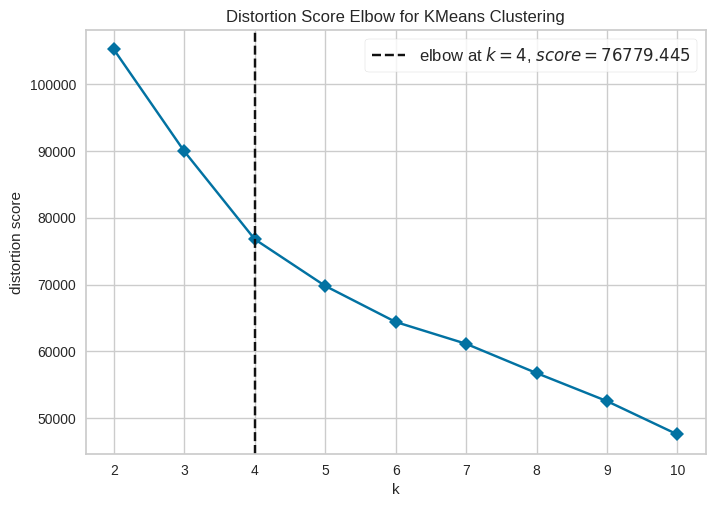

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
vis_elbow = KElbowVisualizer(KMeans(random_state=42), k=k_range, locate_elbow=True, timings=False)
vis_elbow.fit(df_preprocessed)
vis_elbow.finalize()
vis_elbow.show()

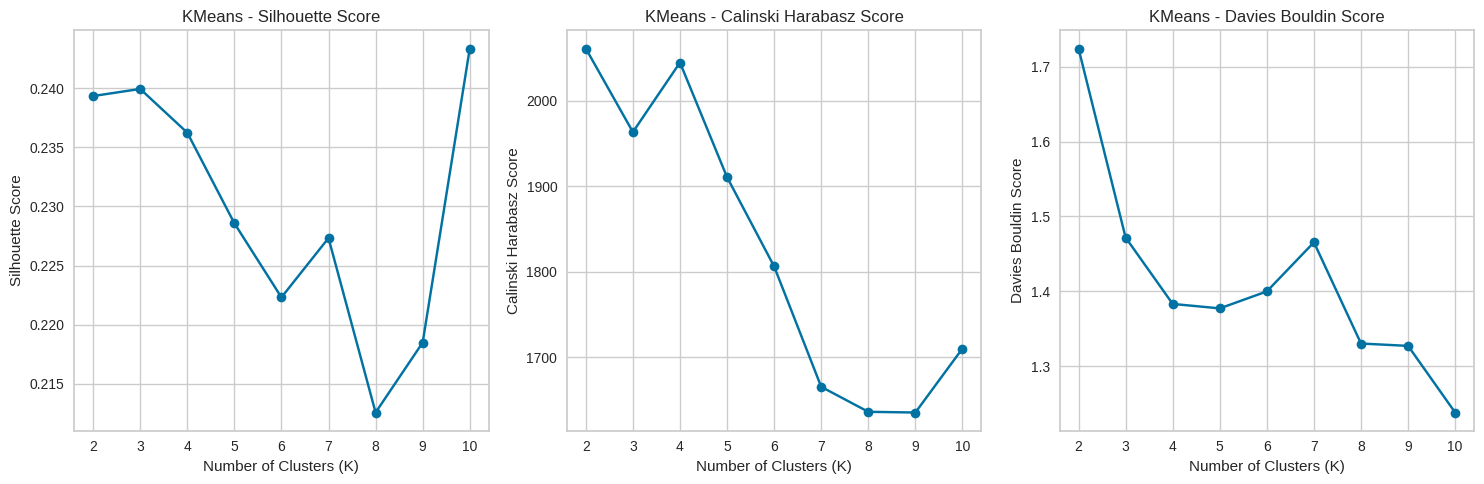

In [25]:
cluster_scores_df = pd.DataFrame(cluster_scores_list)
models = ['KMeans']
metrics = ['Silhouette', 'Calinski Harabasz', 'Davies Bouldin']
plot_cluster_scores(cluster_scores_list, models, metrics)

## Agglomerative Clustering

In [26]:
for k in k_range:
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(df_preprocessed)
    agg_score = cluster_scores(k, 'Agglomerative', df_preprocessed, agg_labels)
    cluster_scores_list.append(agg_score)

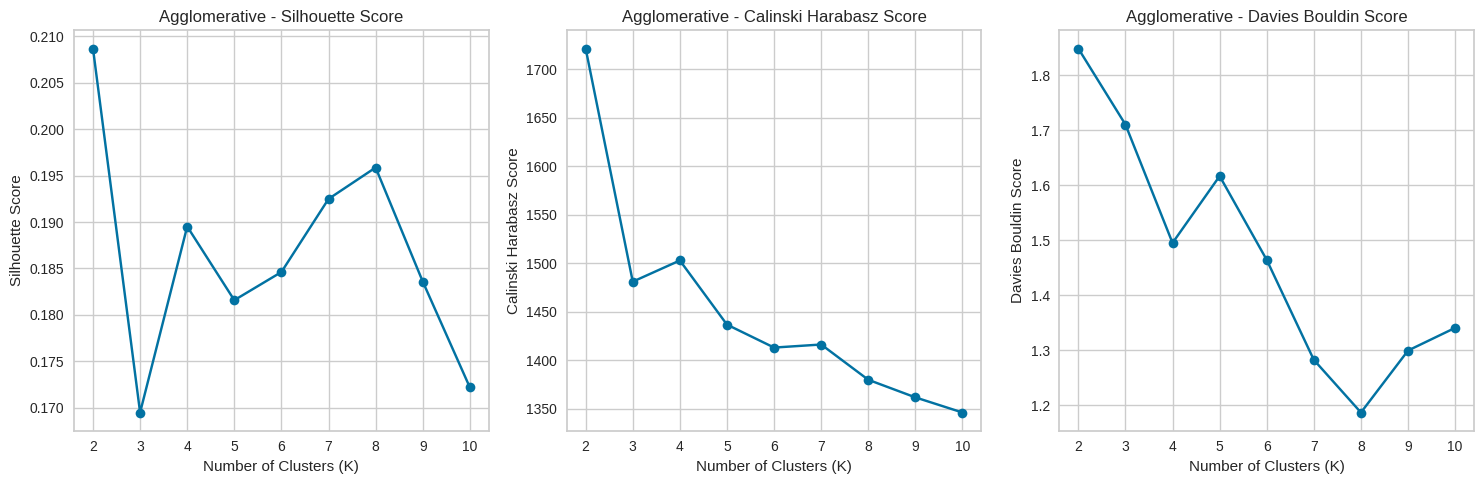

In [27]:
cluster_scores_df = pd.DataFrame(cluster_scores_list)
models = ['Agglomerative']
metrics = ['Silhouette', 'Calinski Harabasz', 'Davies Bouldin']
plot_cluster_scores(cluster_scores_list, models, metrics)

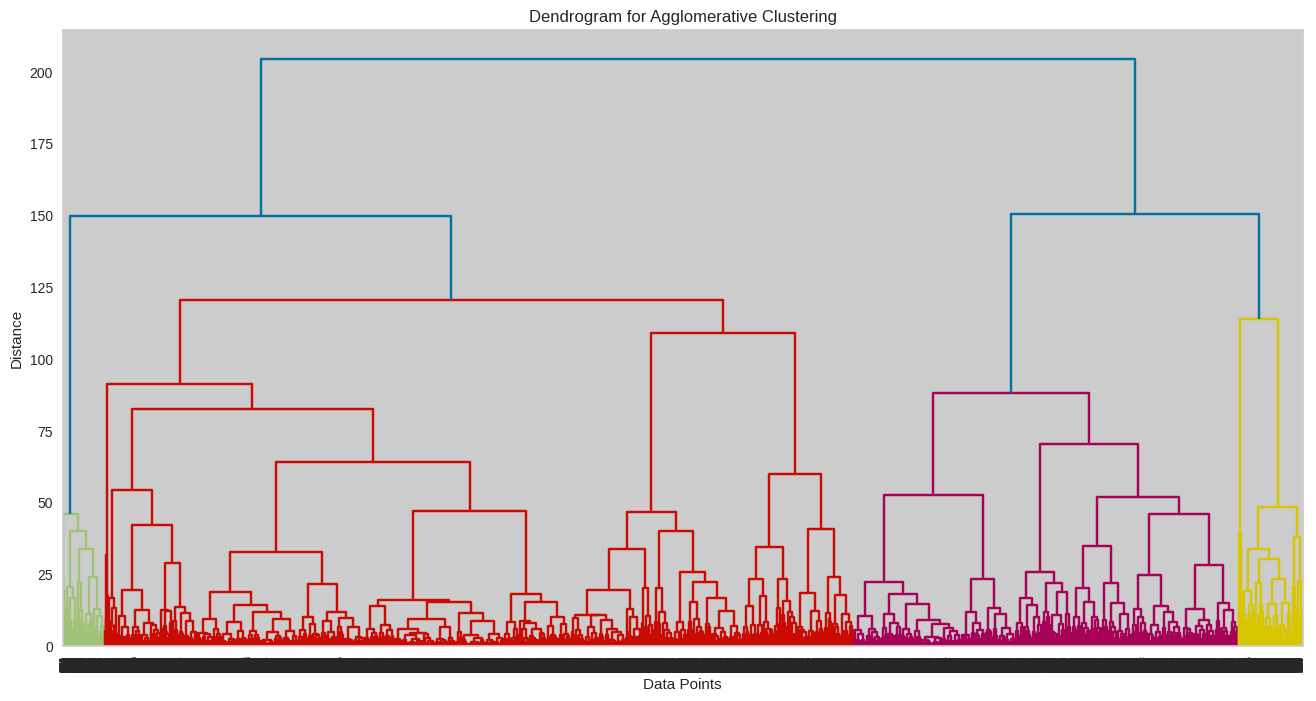

In [28]:
plt.figure(figsize=(16, 8))
linkage_matrix = linkage(df_preprocessed, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## GaussianMixture

In [29]:
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(df_preprocessed)
    gmm_score = cluster_scores(k, 'GMM', df_preprocessed, gmm_labels)
    cluster_scores_list.append(gmm_score)

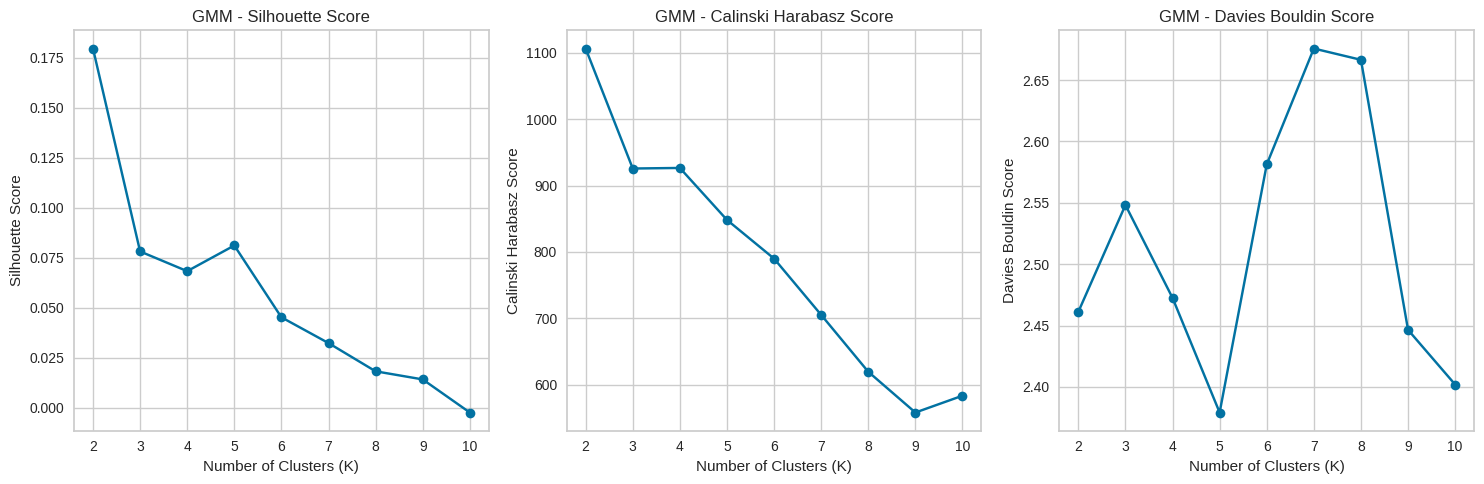

In [30]:
cluster_scores_df = pd.DataFrame(cluster_scores_list)
models = ['GMM']
metrics = ['Silhouette', 'Calinski Harabasz', 'Davies Bouldin']
plot_cluster_scores(cluster_scores_list, models, metrics)

## DBSCAN

In [31]:
dbscan_scores_list = []
eps_values = np.arange(0.5, 2.5, 0.5)
min_samples_values = [2, 3, 4, 5]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df_scaled)
        score = dbscan_scores(eps, min_samples, df_scaled, labels)
        dbscan_scores_list.append(score)

dbscan_scores_df = pd.DataFrame(dbscan_scores_list)

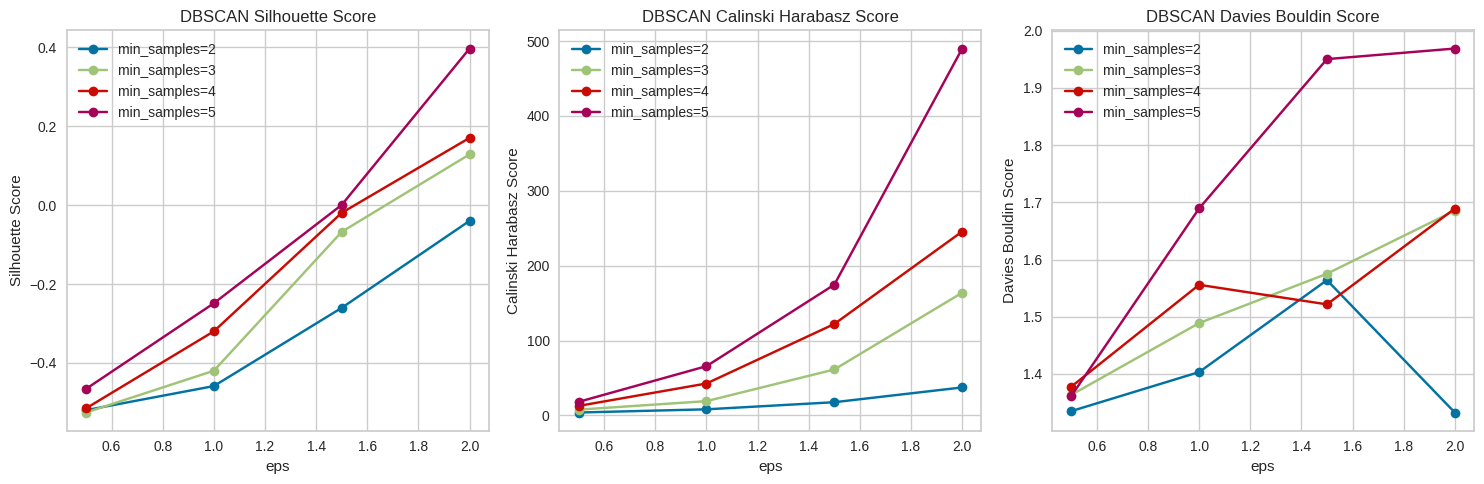

In [32]:
metrics = ['Silhouette', 'Calinski Harabasz', 'Davies Bouldin']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    for min_samp in sorted(dbscan_scores_df['min_samples'].unique()):
        subset = dbscan_scores_df[dbscan_scores_df['min_samples'] == min_samp]
        plt.plot(subset['eps'], subset[f'DBSCAN {metric}'], marker='o', label=f'min_samples={min_samp}')
    plt.title(f'DBSCAN {metric} Score')
    plt.xlabel('eps')
    plt.ylabel(f'{metric} Score')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

## Choose Clustering Method & Number of Clusters

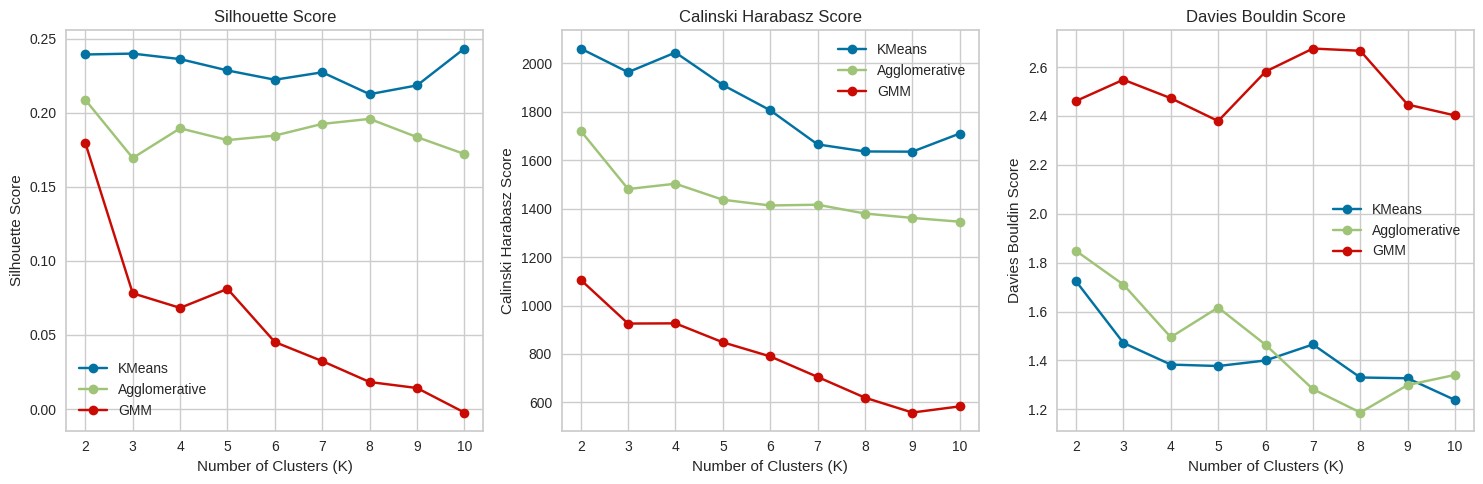

In [33]:
cluster_scores_df = pd.DataFrame(cluster_scores_list)
models = ['KMeans', 'Agglomerative', 'GMM']
metrics = ['Silhouette', 'Calinski Harabasz', 'Davies Bouldin']
plot_cluster_scores(cluster_scores_list, models, metrics)

From Kmeans elbow method, agglomerative clustering dendogram and metrics (Silhouette, Calinski Harabsz and Davies Bouldin) scores, we determine the bestclustering method to be kmeans and best number of clusters to be 4.

# Customer Segmentation

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df_preprocessed) + 1

## Customer Distribution in Clusters

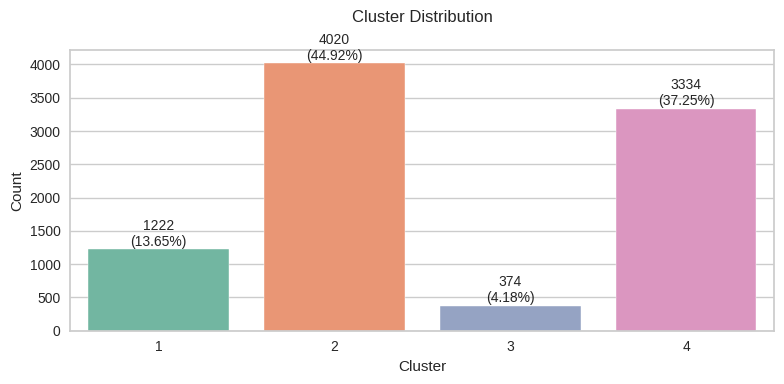

In [35]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='cluster', palette='Set2')
plt.title('Cluster Distribution', pad=20)
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.2f}%'
    ax.text(p.get_x() + p.get_width() / 2, count + 5, f'{count}\n({percentage})', ha='center', va='bottom', fontsize=10)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Cluster Visualization using PCA

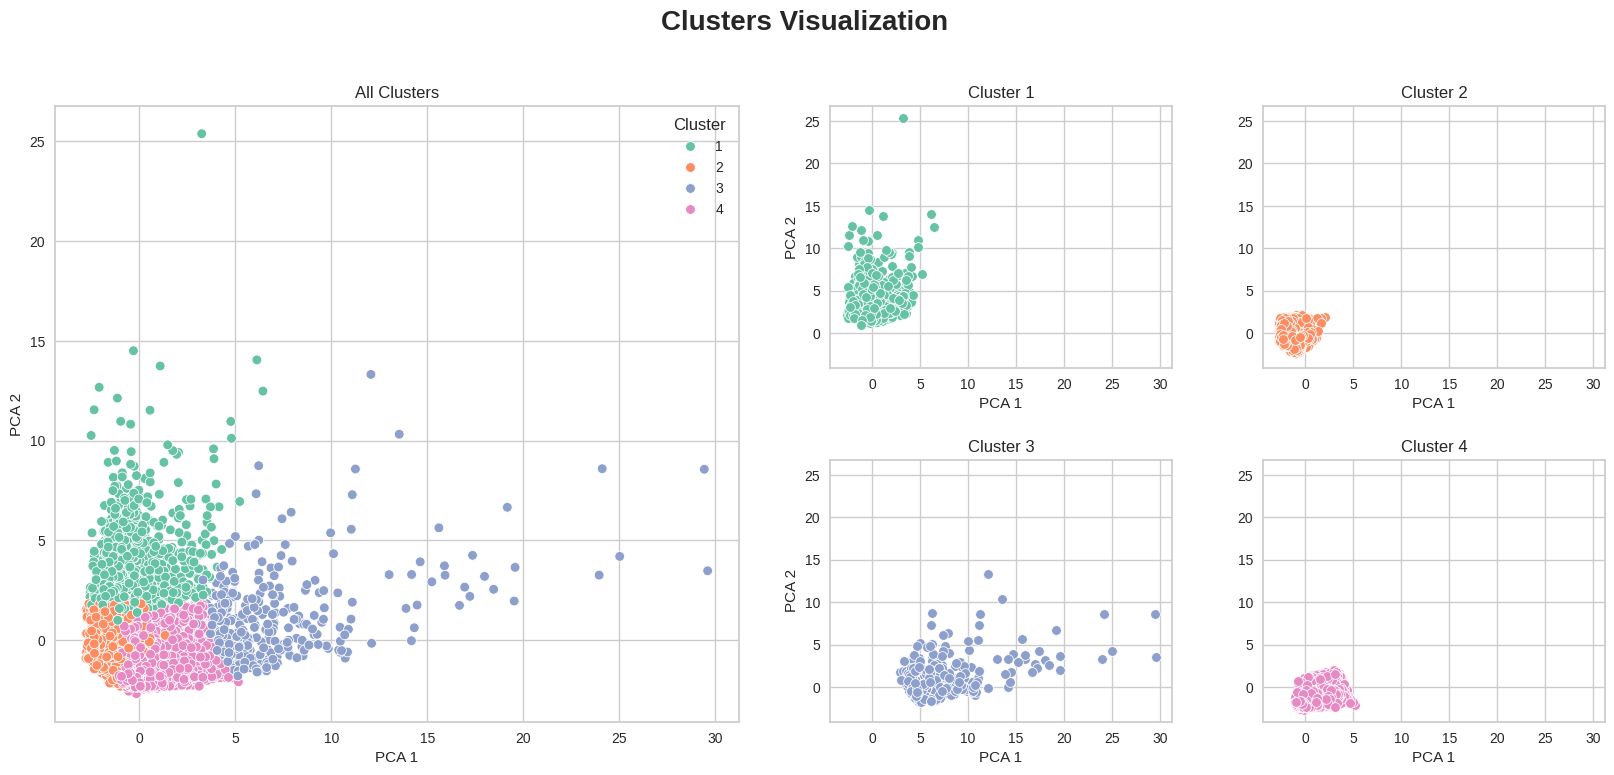

In [36]:
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(df_scaled)
pca_results = pd.DataFrame(pca_results, columns=['pca-one', 'pca-two'])
pca_results['cluster'] = df['cluster']

clusters = sorted(pca_results['cluster'].unique())
colors = sns.color_palette("Set2", n_colors=len(clusters))
cluster_color_map = dict(zip(clusters, colors))
pca_results['color'] = pca_results['cluster'].map(cluster_color_map)
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[2, 1, 1], wspace=0.2, hspace=0.35)
ax_main = fig.add_subplot(gs[:, 0])
sns.scatterplot(data=pca_results, x='pca-one', y='pca-two', hue='cluster', palette=cluster_color_map, ax=ax_main, legend='full')
ax_main.set_title("All Clusters")
ax_main.set_xlabel("PCA 1")
ax_main.set_ylabel("PCA 2")
ax_main.legend(title='Cluster')
axes_cluster = [[None, None], [None, None]]
for i in range(2):
    for j in range(2):
        if i == 0 and j == 0:
            axes_cluster[i][j] = fig.add_subplot(gs[i, j+1])
        else:
            axes_cluster[i][j] = fig.add_subplot(gs[i, j+1], sharex=axes_cluster[0][0], sharey=axes_cluster[0][0])
for idx, cluster in enumerate(clusters[:4]):
    row, col = divmod(idx, 2)
    ax = axes_cluster[row][col]
    cluster_data = pca_results[pca_results['cluster'] == cluster]
    sns.scatterplot(data=cluster_data, x='pca-one', y='pca-two', color=cluster_color_map[cluster], ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel("PCA 1")
    if col == 0:
        ax.set_ylabel("PCA 2")
    else:
        ax.set_ylabel("")
plt.suptitle("Clusters Visualization", fontsize=20, fontweight='bold' , y=1.0)
plt.tight_layout()
plt.show()

## Cluster Statistical Description

In [37]:
cluster_profiles = df.groupby('cluster').describe().round(2).transpose()
cluster_profiles

cluster                                        1         2         3         4
BALANCE                          count   1222.00   4020.00    374.00   3334.00
                                 mean    4553.78   1001.31   3730.09    904.92
                                 std     2750.81   1093.57   3403.25   1225.94
                                 min       78.11      0.00    150.95      0.00
                                 25%     2423.30     78.62    975.47     82.85
                                 50%     4217.36    745.53   2719.93    341.46
                                 75%     6108.97   1485.31   5381.40   1265.37
                                 max    16304.89   8115.04  19043.14   9502.26
BALANCE_FREQUENCY                count   1222.00   4020.00    374.00   3334.00
                                 mean       0.97      0.79      0.99      0.94
                                 std        0.09      0.30      0.06      0.15
                                 min        0.18      0.00      0.27      0.00
                                 25%        1.00      0.55      1.00      1.00
                                 50%        1.00      1.00      1.00      1.00
                                 75%        1.00      1.00      1.00      1.00
                                 max        1.00      1.00      1.00      1.00
PURCHASES                        count   1222.00   4020.00    374.00   3334.00
                                 mean     488.52    277.57   8058.27   1275.37
                                 std      835.23    474.20   6114.17   1075.01
                                 min        0.00      0.00    900.87      8.40
                                 25%        0.00      0.00   4921.48    449.42
                                 50%       78.81     85.60   6112.26    924.27
                                 75%      635.58    349.01   8804.15   1832.98
                                 max     5197.22   4900.00  49039.57   6520.00
ONEOFF_PURCHASES                 count   1222.00   4020.00    374.00   3334.00
                                 mean     309.83    213.79   5400.68    613.20
                                 std      633.79    454.00   5522.63    889.89
                                 min        0.00      0.00      0.00      0.00
                                 25%        0.00      0.00   2397.40      0.00
                                 50%        0.00      0.00   3889.30    181.00
                                 75%      324.22    218.15   6511.58    935.40
                                 max     4139.56   4900.00  40761.25   6520.00
INSTALLMENTS_PURCHASES           count   1222.00   4020.00    374.00   3334.00
                                 mean     178.78     64.04   2659.20    662.45
                                 std      413.42    159.96   2824.37    643.65
                                 min        0.00      0.00      0.00      0.00
                                 25%        0.00      0.00    800.58    230.42
                                 50%        0.00      0.00   1891.08    462.16
                                 75%      137.73     56.96   3386.66    900.00
                                 max     4059.93   3000.00  22500.00   4538.84
CASH_ADVANCE                     count   1222.00   4020.00    374.00   3334.00
                                 mean    4484.78    573.94    732.82    209.71
                                 std     3585.47    891.37   2067.96    599.82
                                 min        0.00      0.00      0.00      0.00
                                 25%     2321.16      0.00      0.00      0.00
                                 50%     3613.09    102.47      0.00      0.00
                                 75%     5573.47    916.38    321.03      0.00
                                 max    47137.21   6523.78  19513.47   7894.58
PURCHASES_FREQUENCY              count   1222.00   4020.00    374.00   3334.00
                                 mean       0.28  

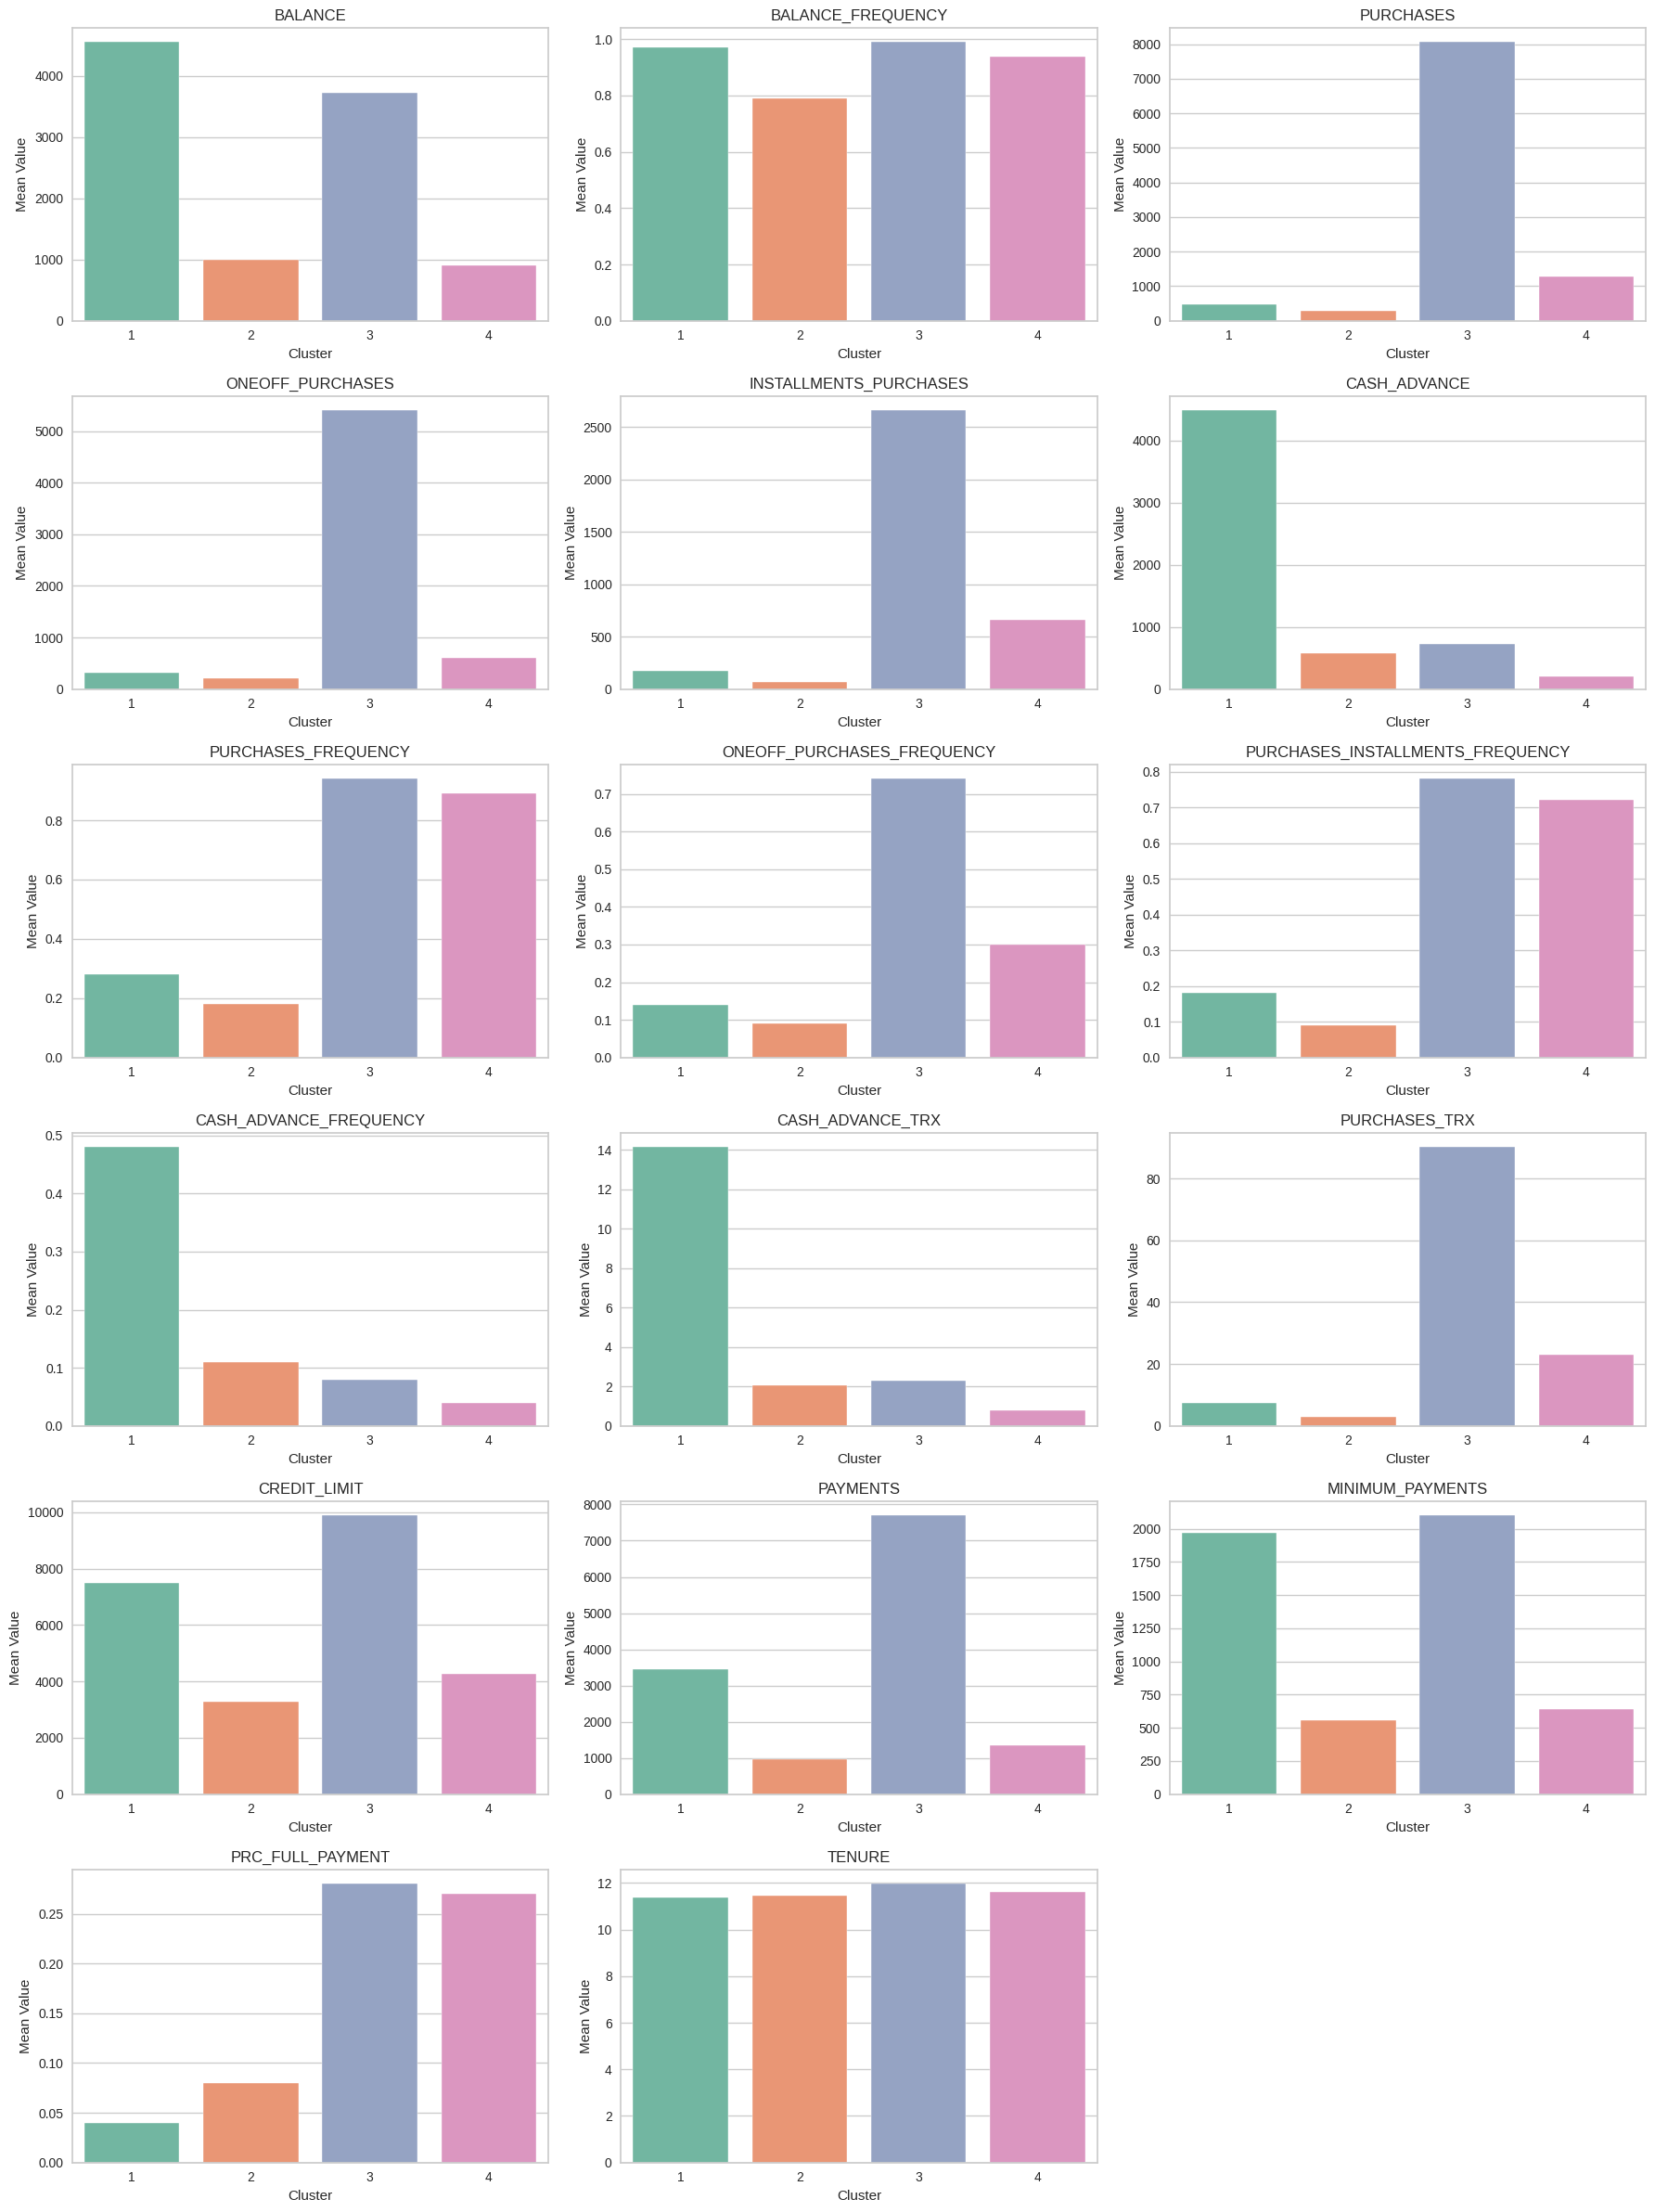

In [38]:
def plot_features_mean(cluster_profiles_mean):
    df_long = cluster_profiles_mean.melt(id_vars='cluster', var_name='feature', value_name='mean_value')
    features = df_long['feature'].unique()
    fig, axes = plt.subplots(6, 3, figsize=(18, 24))
    axes = axes.flatten()
    palette = sns.color_palette('Set2', n_colors=cluster_profiles_mean['cluster'].nunique())
    for i, feature in enumerate(features):
        ax = axes[i]
        data = df_long[df_long['feature'] == feature]
        sns.barplot(data=data, x='cluster', y='mean_value', palette=palette, ax=ax)
        ax.set_title(feature)
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Mean Value')
    for j in range(i+1, 6*3):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

cluster_profiles_mean = df.groupby('cluster').mean().round(2).reset_index()
plot_features_mean(cluster_profiles_mean)

## Cluster Profiles

Cluster 1:  High Balance, Cash Oriented Customers
- Maintain high credit balances with frequent balance updates.
- Relatively low purchase frequency, especially for one-off or installment purchases.
- Rely heavily on cash advances, both in amount and transaction frequency.
- Show low full payment behavior.
- Have a moderate to high credit limit and a long tenure.

Cluster 2: Low Engagement, Low Activity Users
- Lowest balance levels and limited credit activity overall
- Rarely make purchases and show very low frequency of any type of transaction.
- Limited use of cash advances with low associated frequencies.
- Low credit limit, minimal payments, and small minimum payments.
- Show minimal full payment behavior.

Cluster 3: High-Spending, Frequent Usage Customer
- Make very high-value purchases, especially one-off and installment-based.
- Maintain high balance frequency and high overall balance.
- Rarely use cash advances.
- Exhibit high purchase frequency and frequent installment use.
- Have the highest credit limit, with high payments and minimum payments.
- High full payment rate.

Cluster 4: Moderate Usage Customers
- Make frequent purchases, both one-off and installment-based.
- Hold low balances.
- Use cash advances rarely, with very low frequency.
- Maintain a moderate credit limit and pay a fair portion of their dues.
- High full payment rate.

# Visualization and Analysis

In [39]:
def feature_distribution(df):
    features = df.drop('cluster', axis=1).columns
    clusters = sorted(df['cluster'].unique())
    cluster_palette = sns.color_palette('Set2')
    for feature in features:
        fig = plt.figure(figsize=(18, 6))
        spec = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.5], height_ratios=[1, 1], wspace=0.35, hspace=0.5)
        for i, cluster in enumerate(clusters):
            row, col = divmod(i, 2)
            ax = fig.add_subplot(spec[row, col])
            sns.histplot(df[df['cluster'] == cluster][feature], bins=30, kde=True, color=cluster_palette[i], ax=ax)
            ax.set_title(f'Cluster {cluster} - {feature}')
            ax.set_xlabel(feature)
            ax.set_ylabel('Count')
        ax_box = fig.add_subplot(spec[:, 2])
        sns.boxplot(data=df, x='cluster', y=feature, palette='Set2', ax=ax_box)
        ax_box.set_title(f'{feature} - Boxplot by Cluster')
        ax_box.set_xlabel('Cluster')
        ax_box.set_ylabel(feature)
        plt.suptitle(f'{feature} Distribution by Cluster', fontsize=15, fontweight='bold', y=1.0)
        plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.5, wspace=0.5)
        plt.show()
        divider = plt.figure(figsize=(18, 0.2))
        plt.axhline(y=0.5, color='gray', linestyle='--')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

def feature_boxplots(df, features, title='Boxplots by Cluster'):
    n = len(features)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5), sharey=False)
    axes = axes.flatten() if n > 1 else [axes]
    for i, feature in enumerate(features):
        sns.boxplot(data=df, x='cluster', y=feature, hue='cluster', palette='Set2', ax=axes[i])
        axes[i].set_title(f'{feature}')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel('')
        axes[i].legend().remove()
    for j in range(n, len(axes)):
        axes[j].axis('off')
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=len(labels), title='Clusters', bbox_to_anchor=(0.5, 1.02))
    plt.suptitle(title, fontsize=15, fontweight='bold', y=1.05)
    plt.subplots_adjust(top=0.80, wspace=0.35, hspace=0.35)
    plt.show()

## Features Distribution

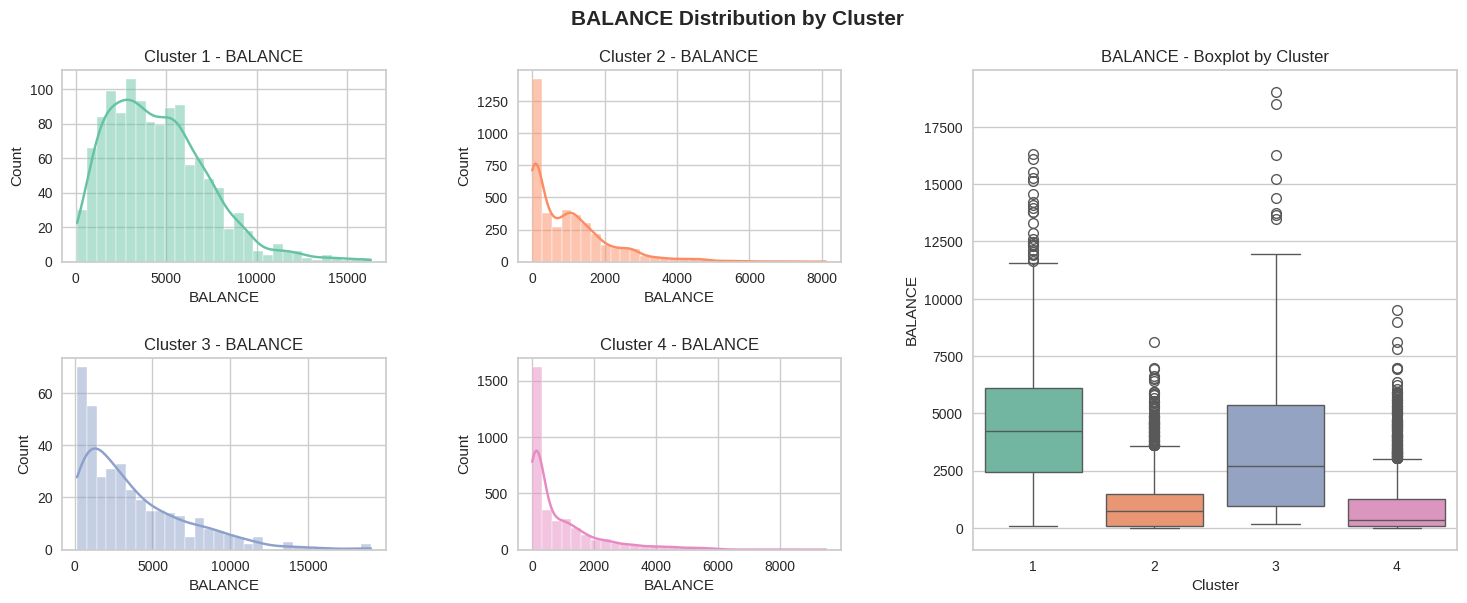

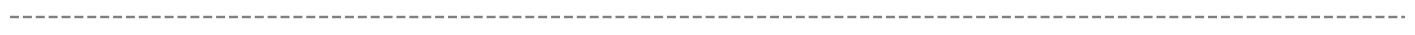

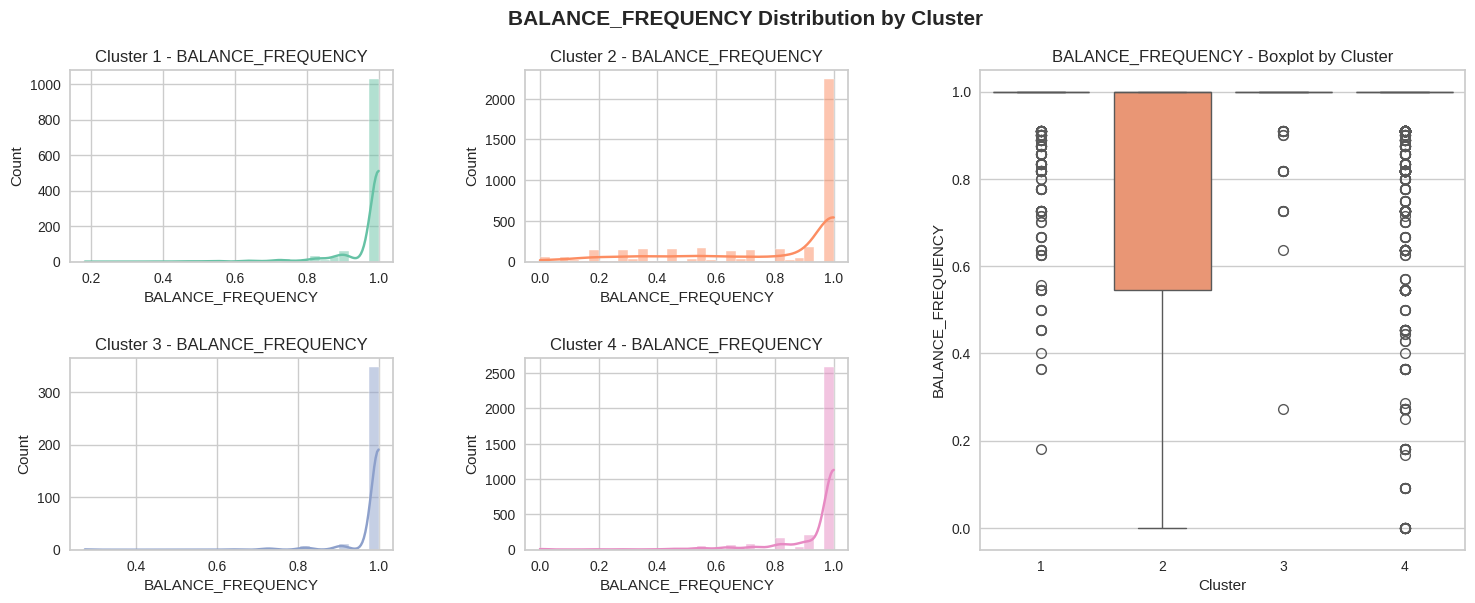

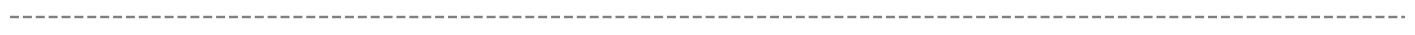

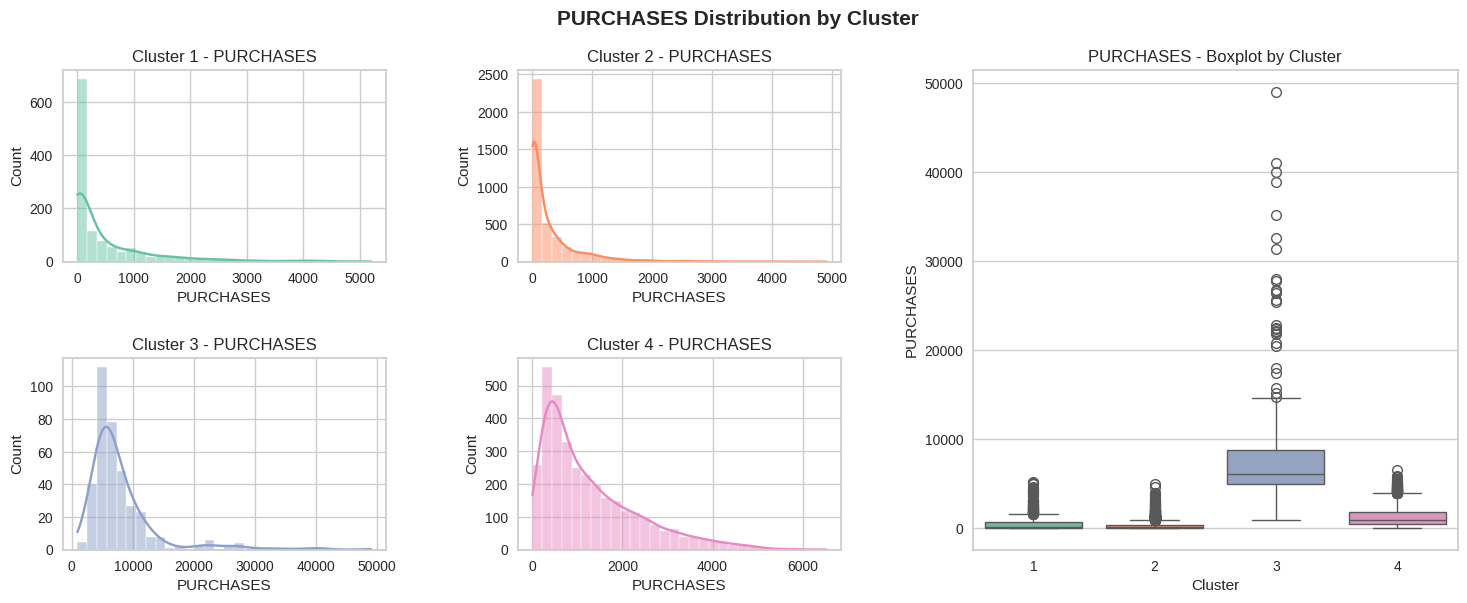

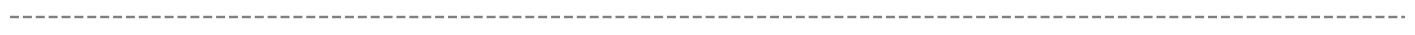

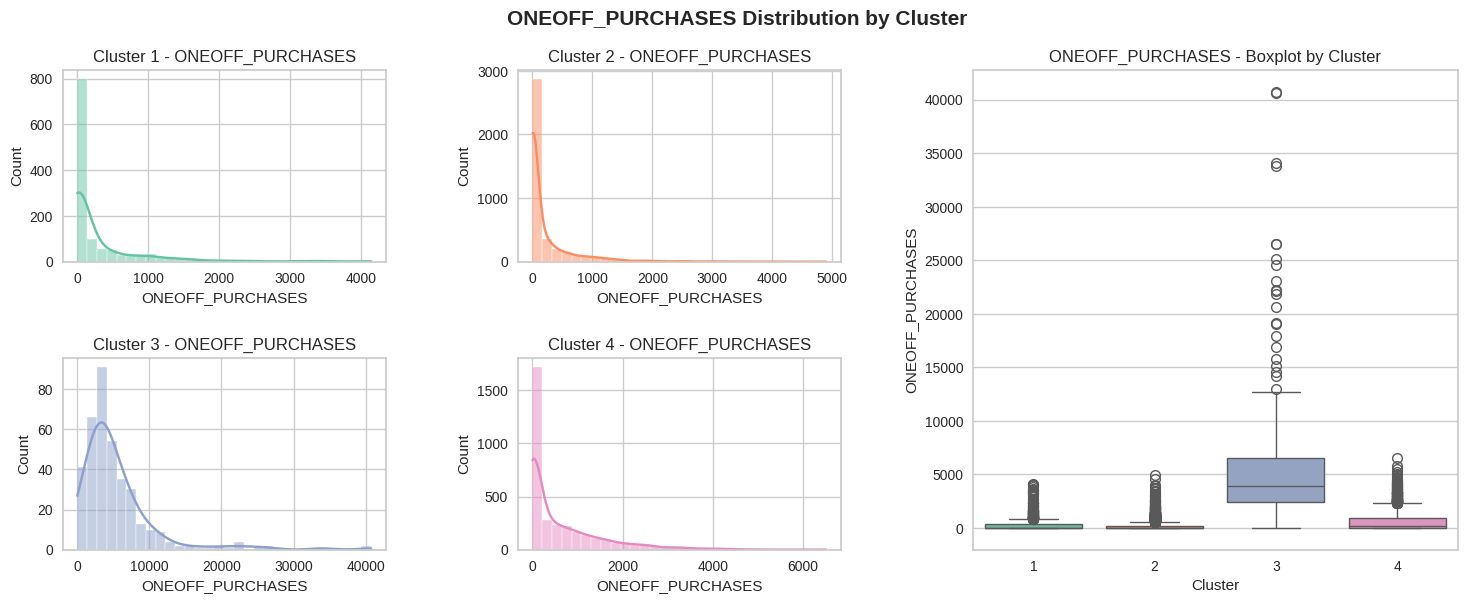

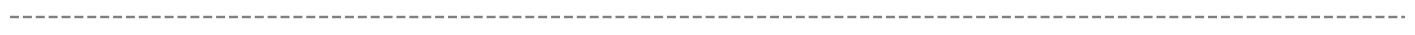

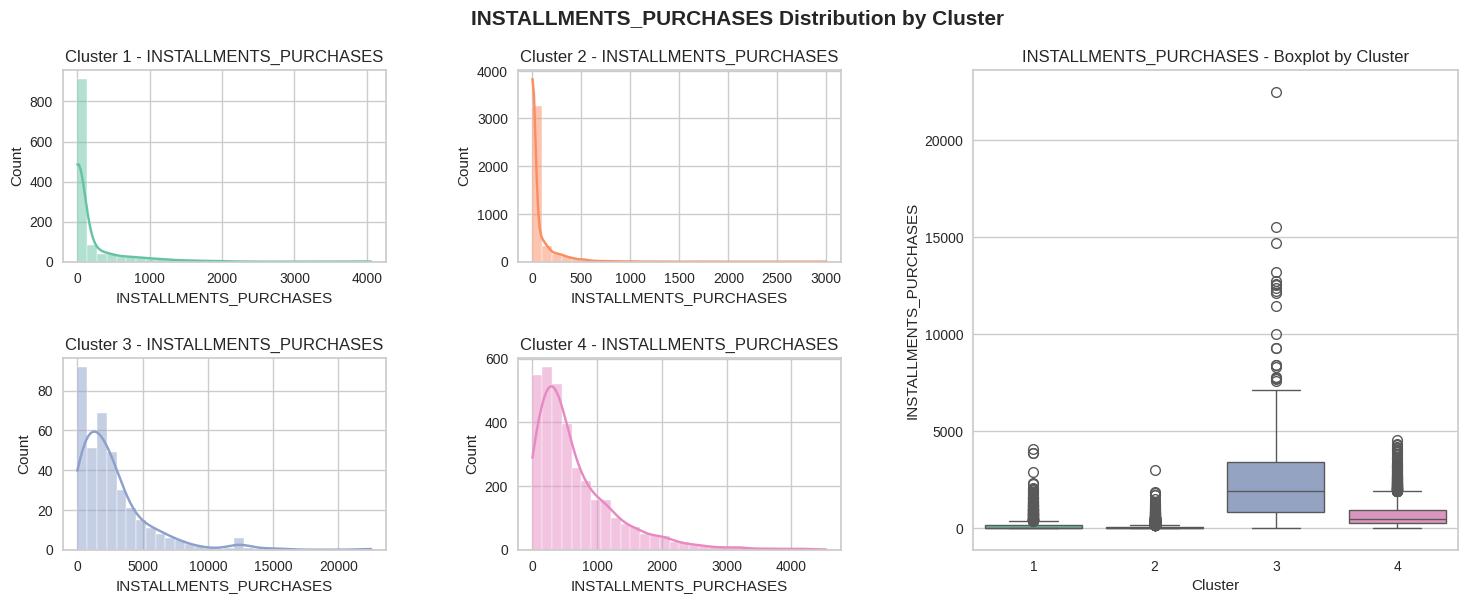

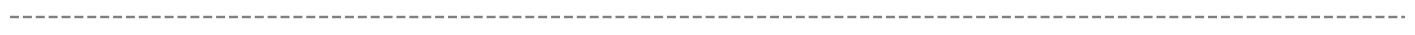

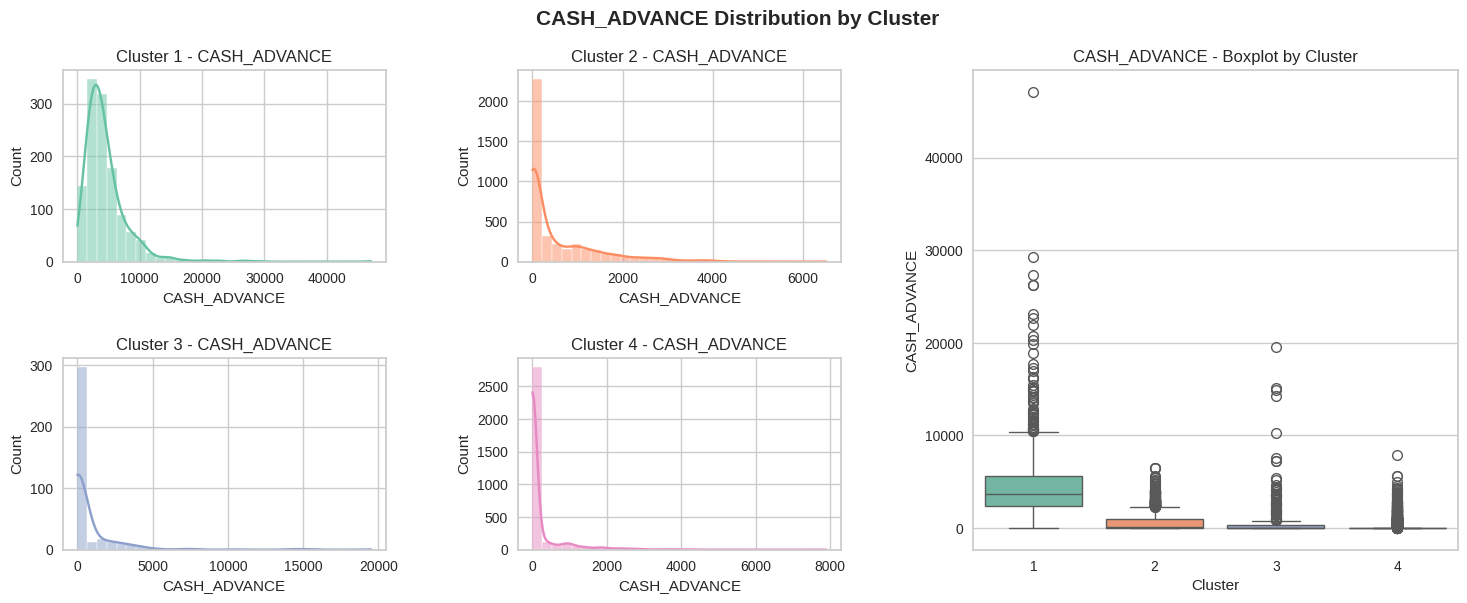

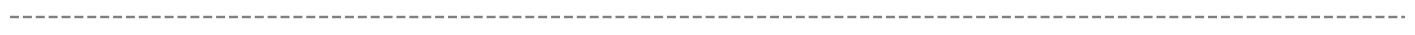

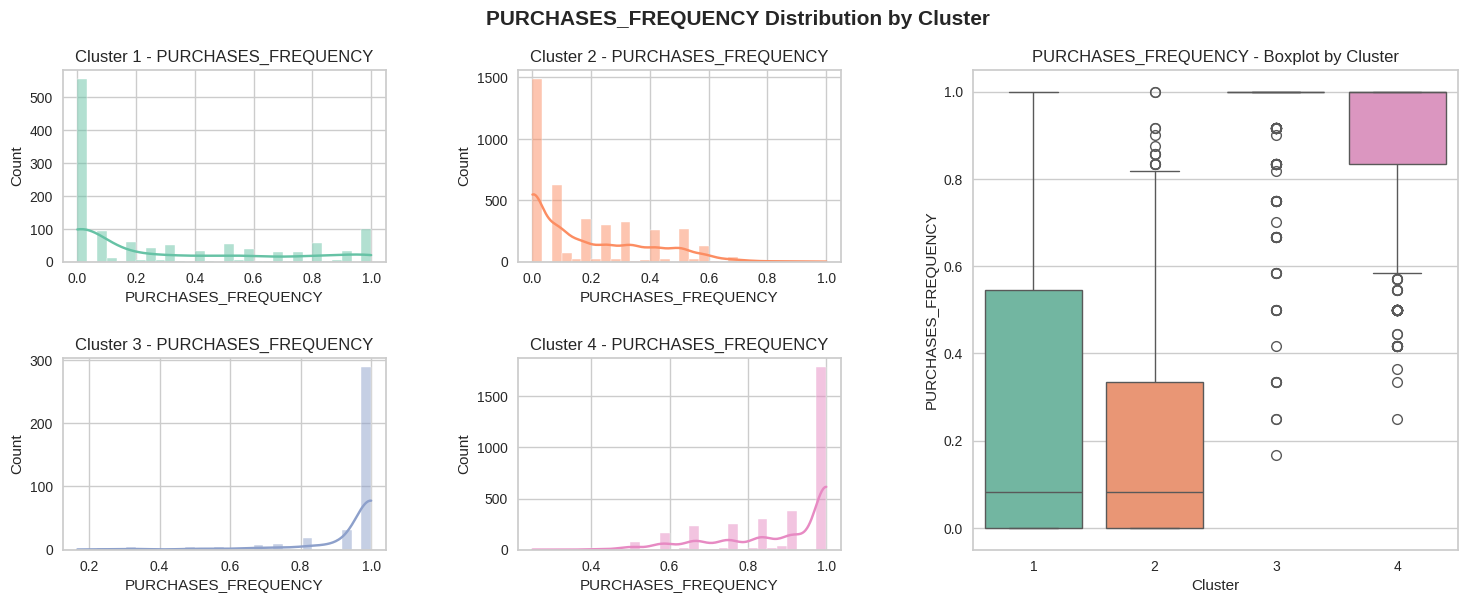

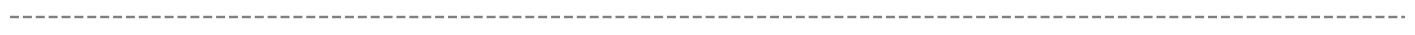

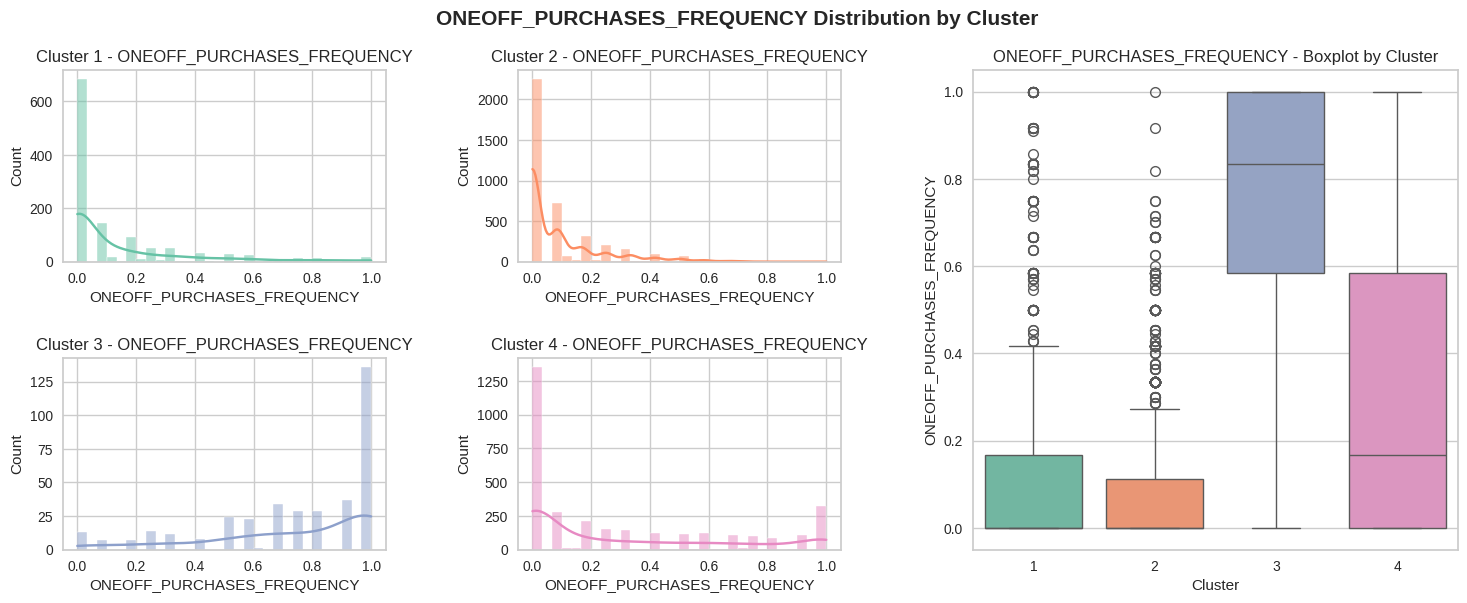

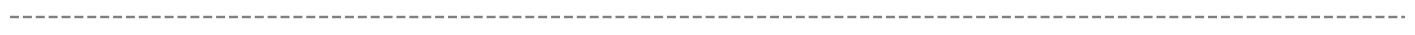

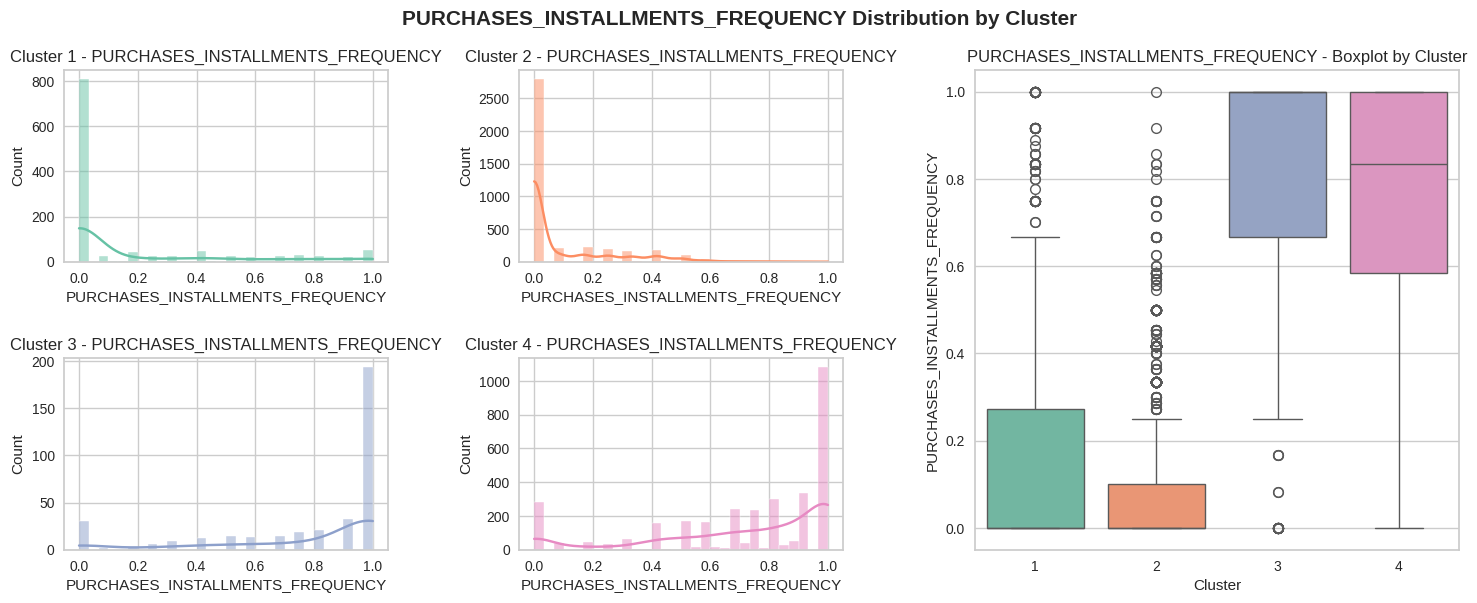

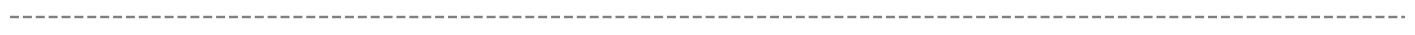

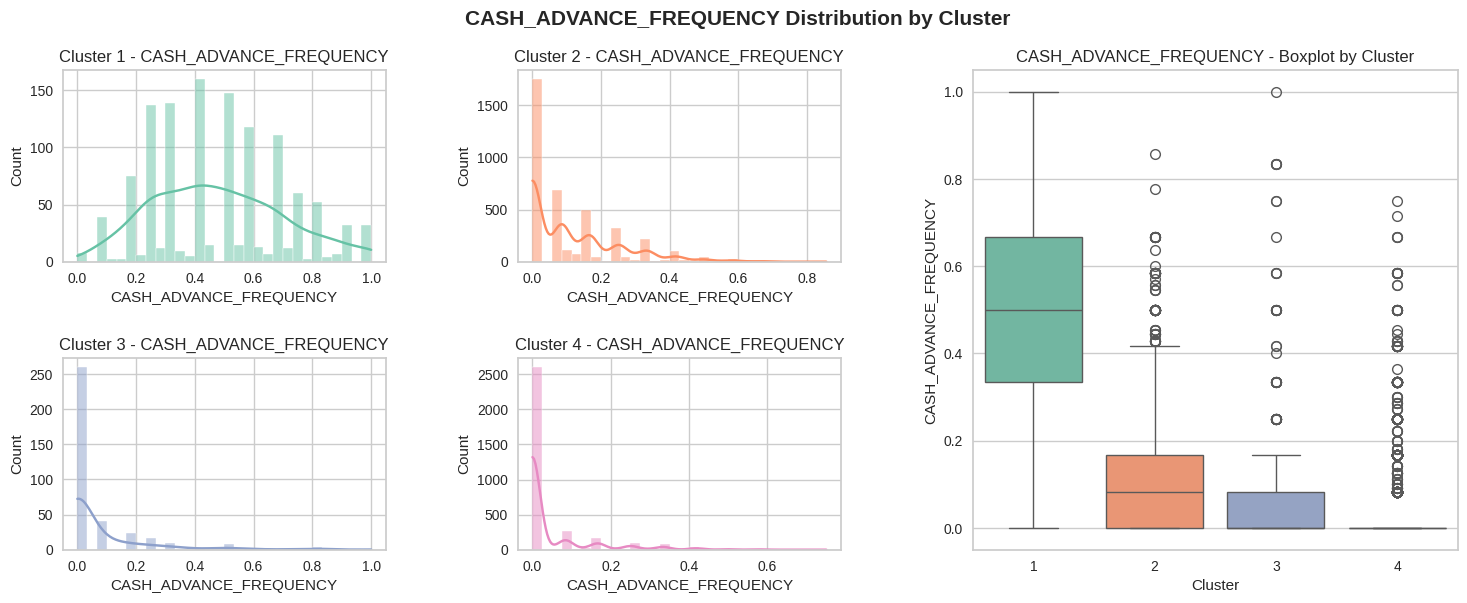

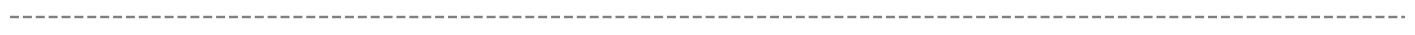

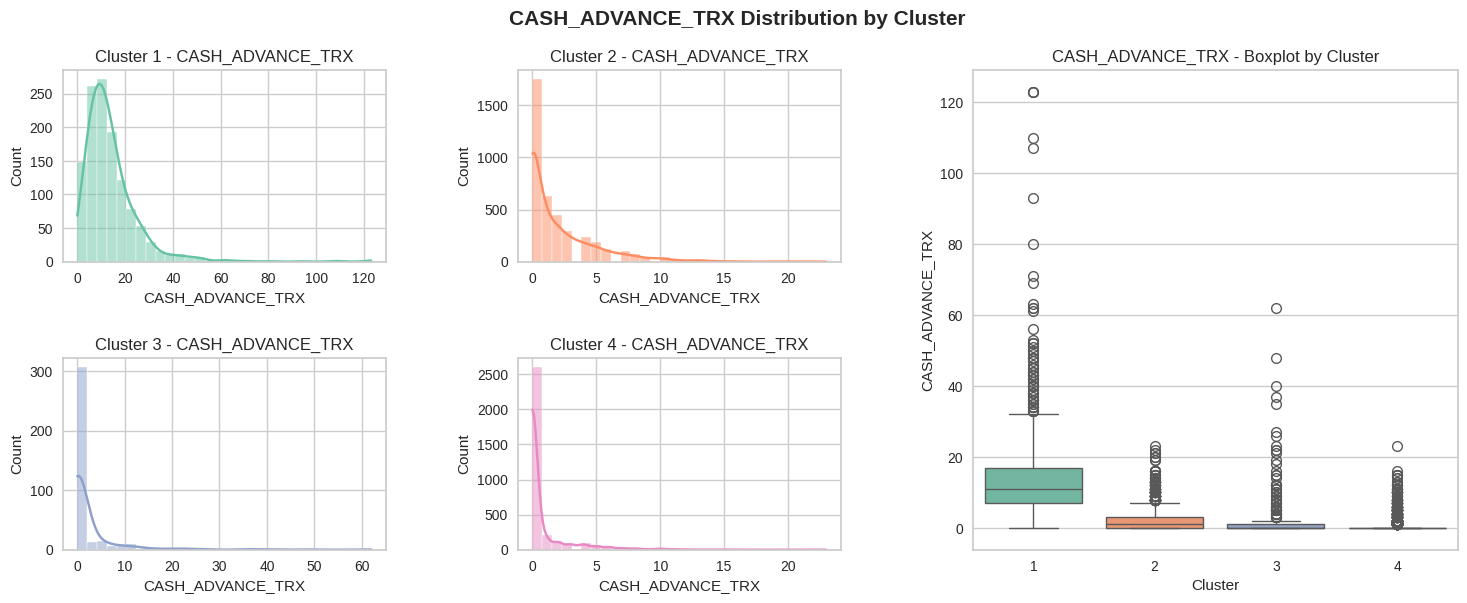

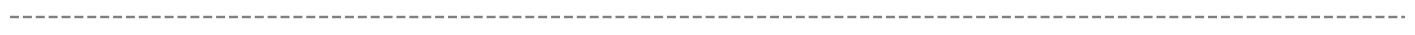

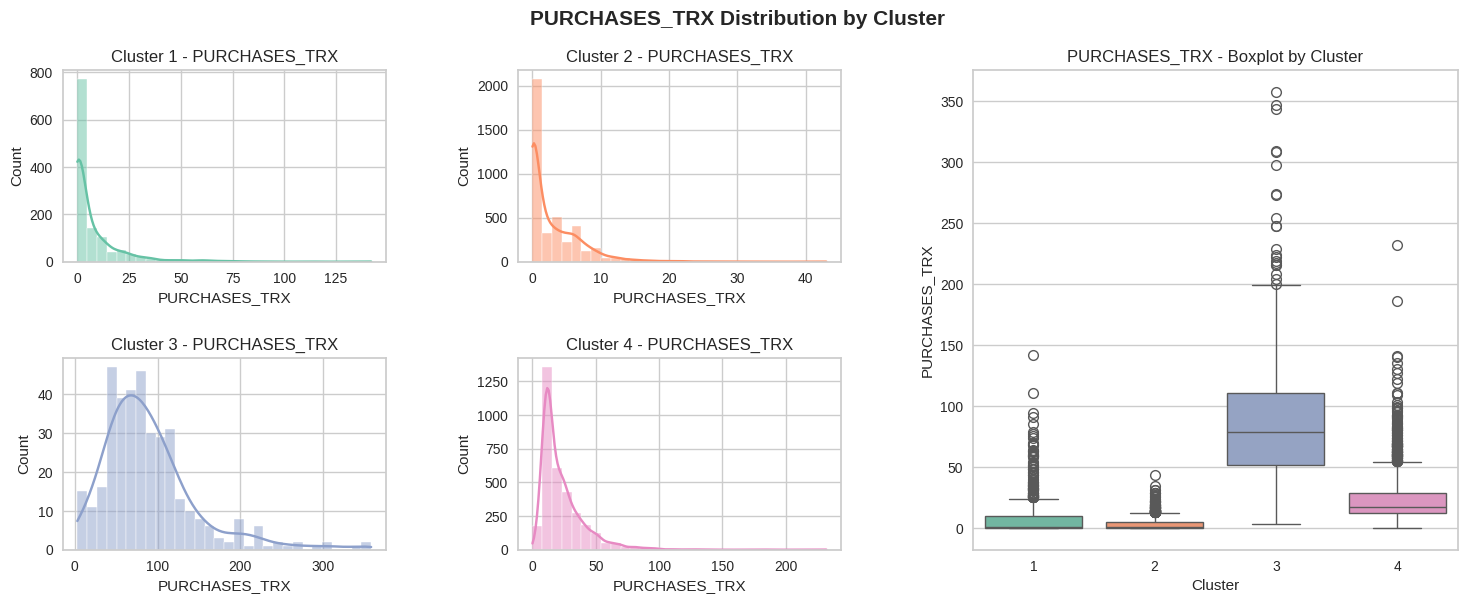

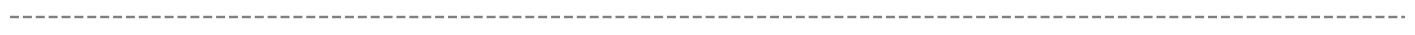

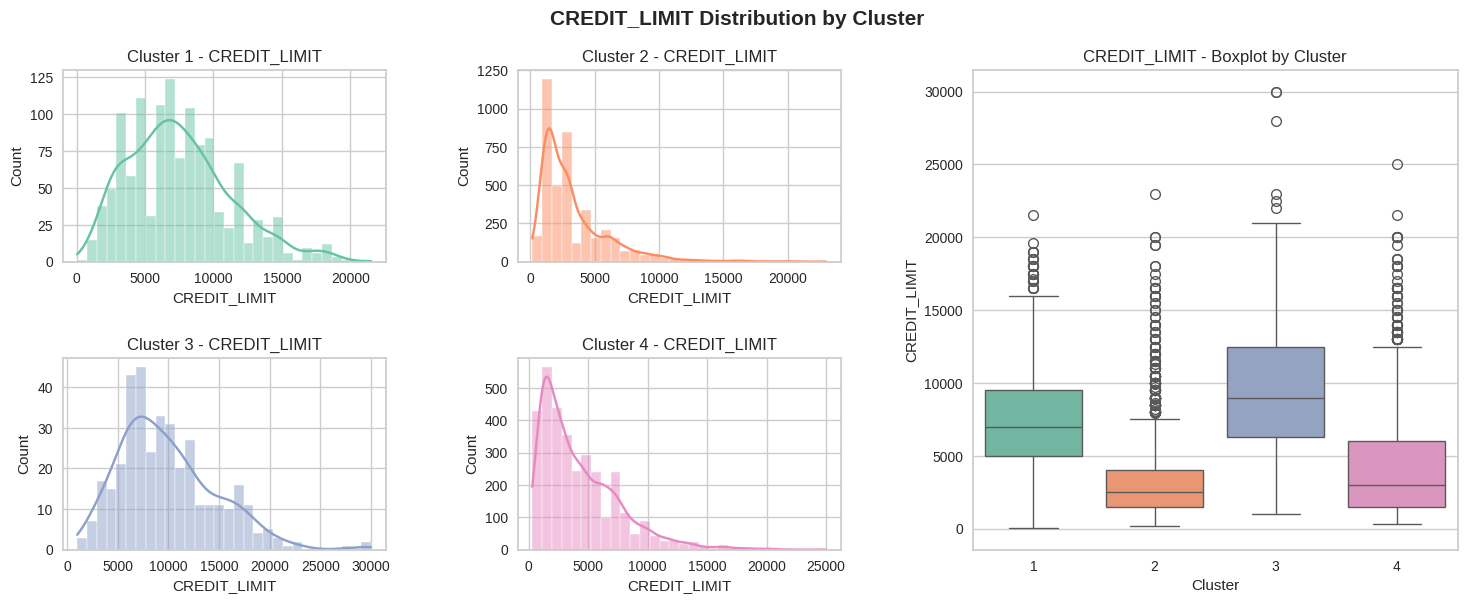

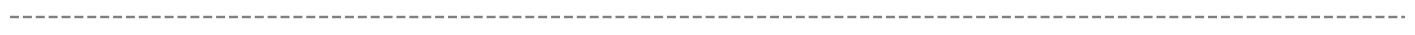

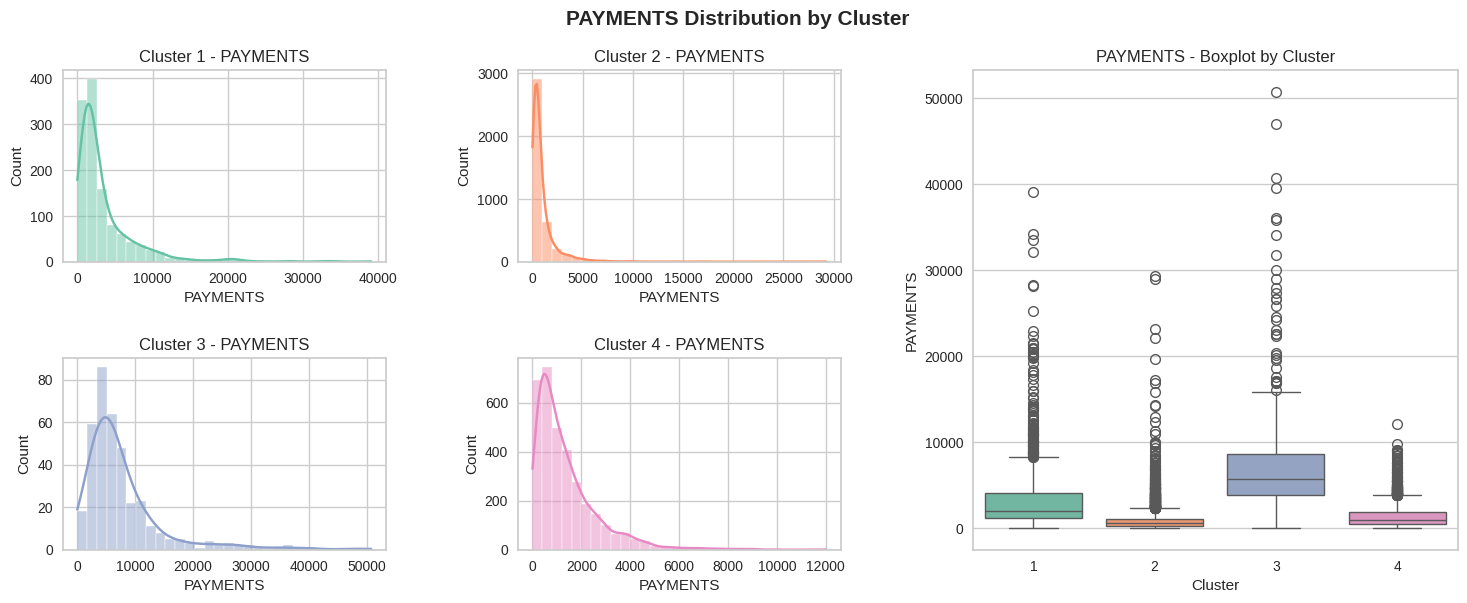

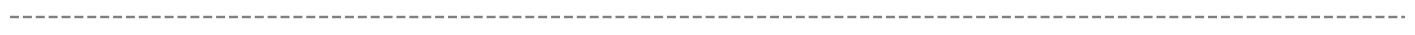

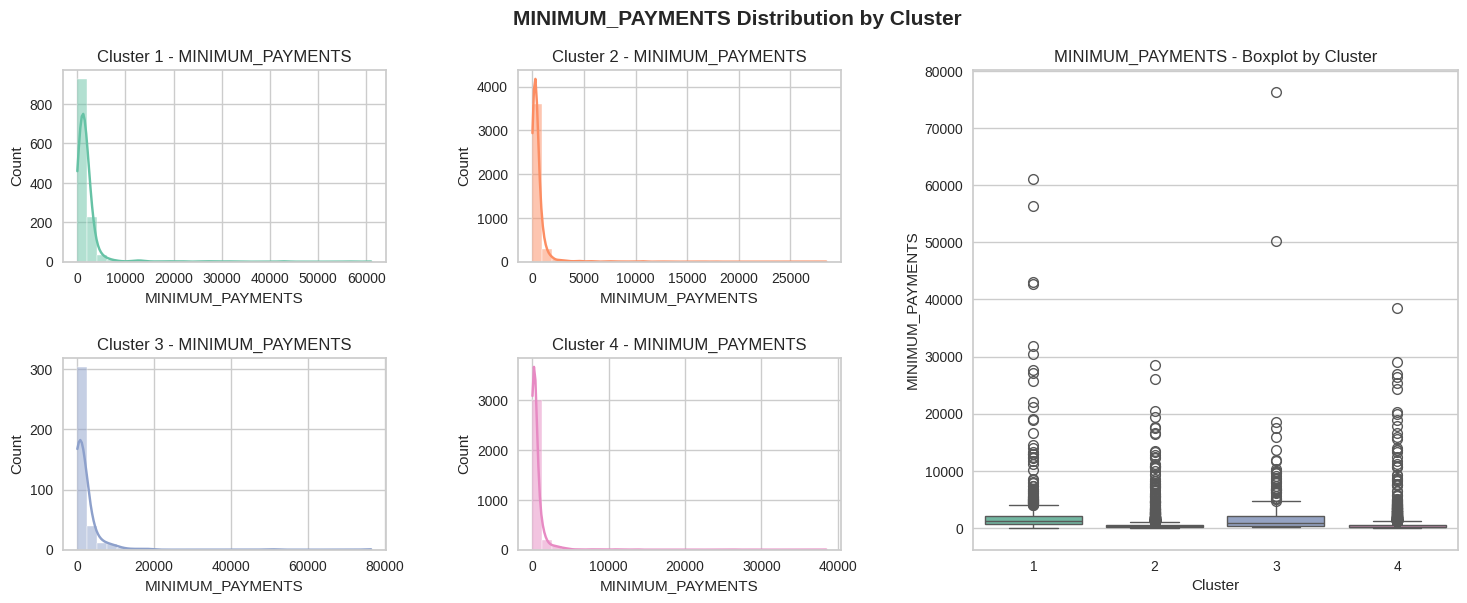

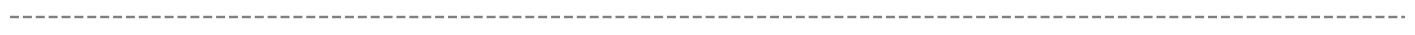

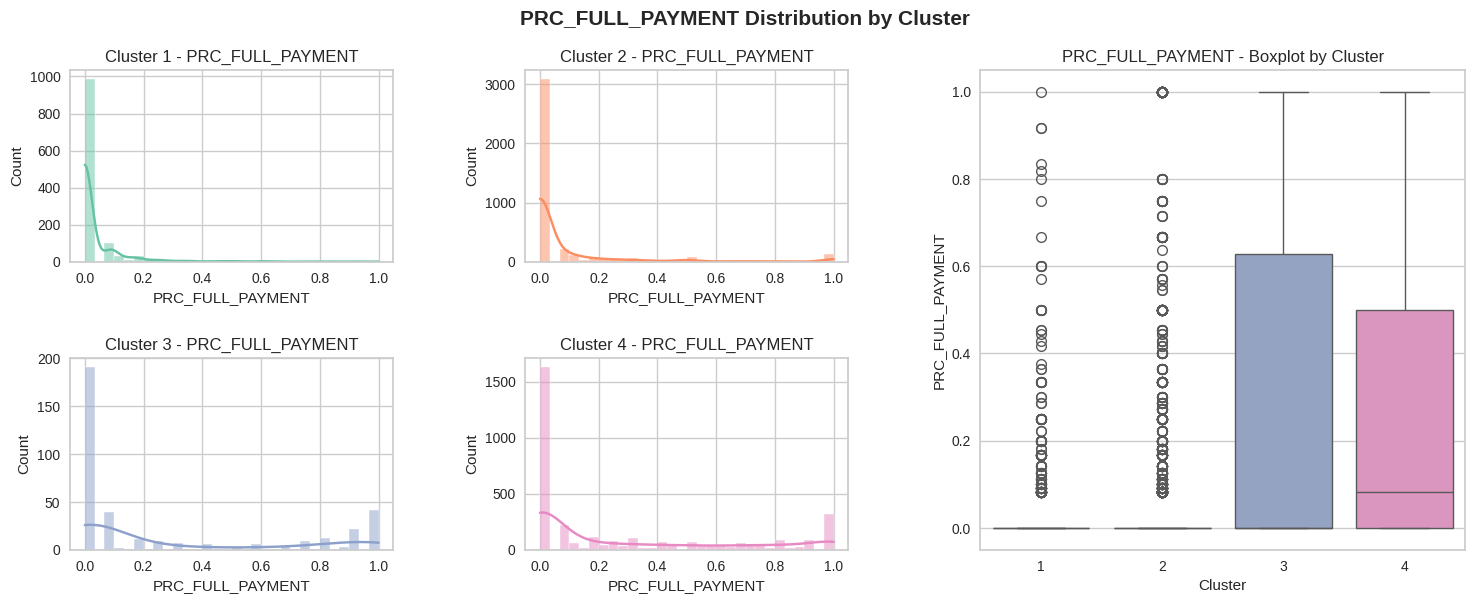

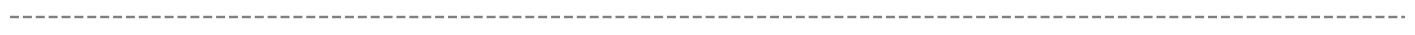

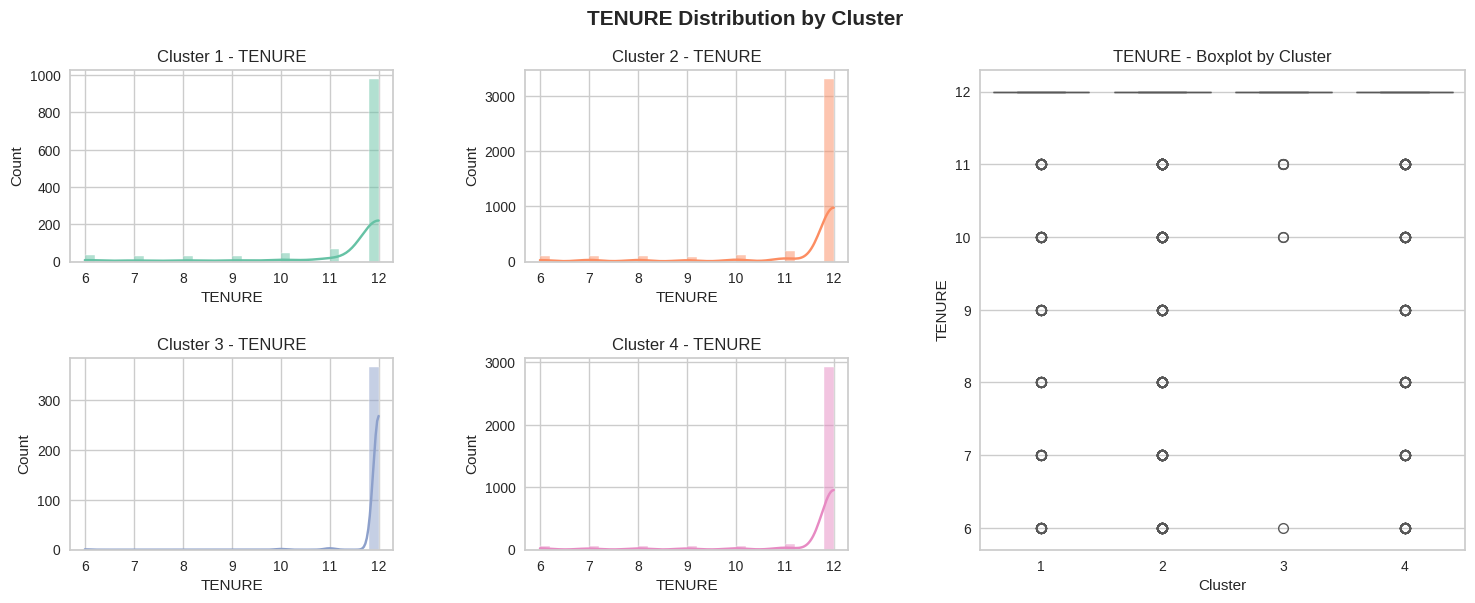

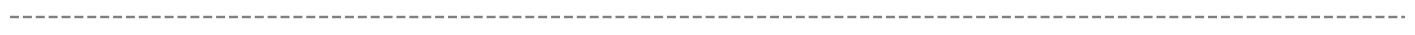

In [40]:
feature_distribution(df)

## Features Boxplot

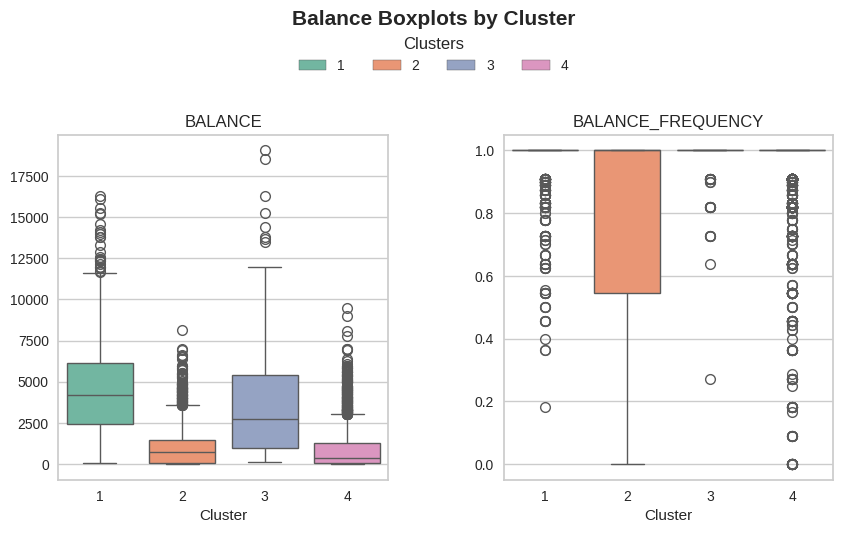

In [41]:
balance_features = ['BALANCE', 'BALANCE_FREQUENCY']
feature_boxplots(df, balance_features, 'Balance Boxplots by Cluster')

Balance: Cluster 2&4 customers have smaller distribution in balances and smaller balances overall compared to clusters 1&3 whose customers have bigger balances.

Balance Frequency: While most of cluster 2 customers update their balnce frequently, Cluster 2 customers stand out from other clusters for having more users who don't update their balances frequently.

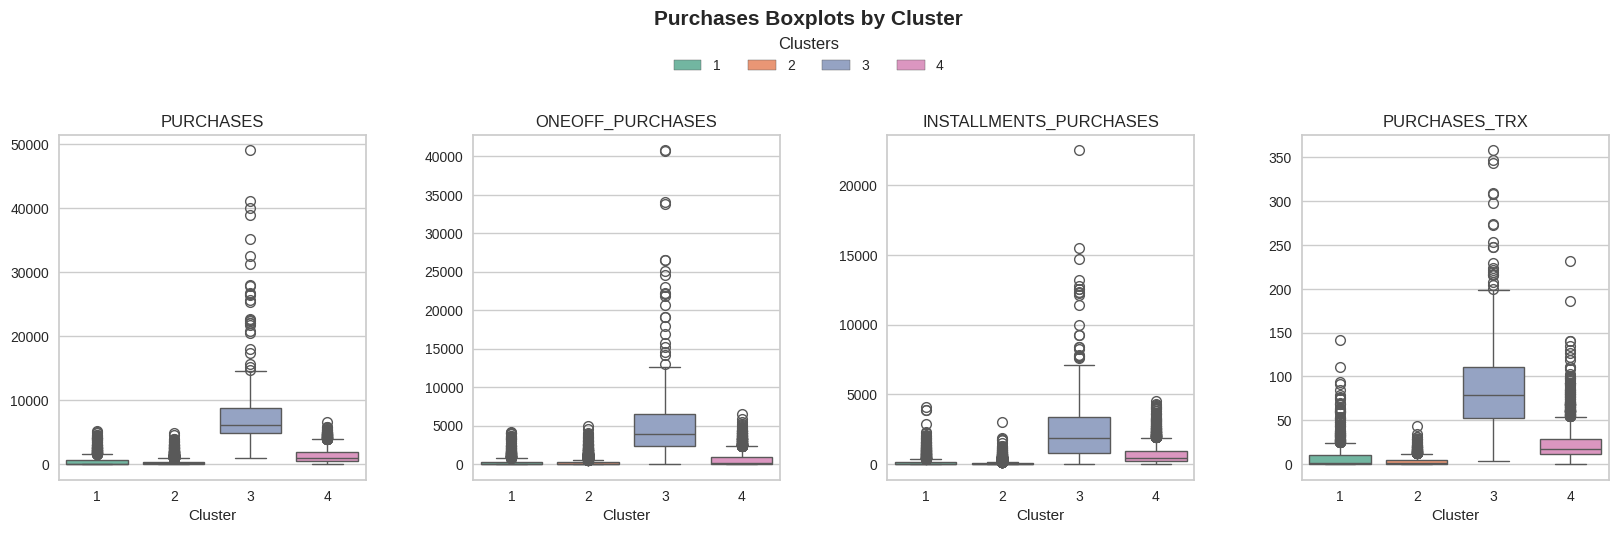

In [42]:
purchases_features = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX']
feature_boxplots(df, purchases_features, 'Purchases Boxplots by Cluster')

Purchases Columns: Cluster 3 has a higher values and larger distribution in all 4 attributes (purchases, one-off purchases, installment purchases, and purchases transactions).

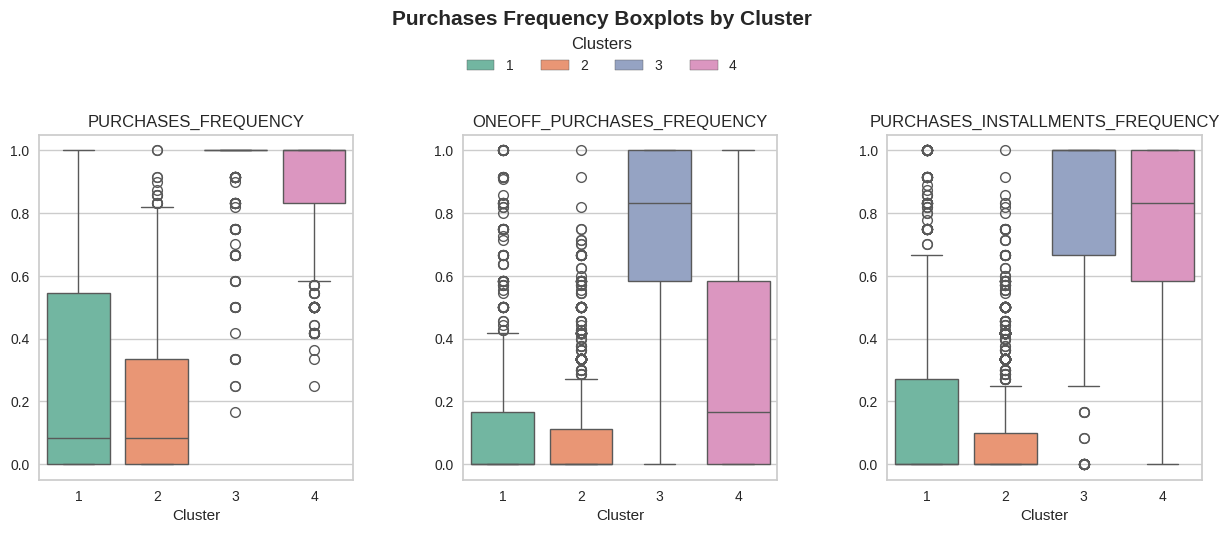

In [43]:
purchases_frequency_features = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
feature_boxplots(df, purchases_frequency_features, 'Purchases Frequency Boxplots by Cluster')

Purchases Frequency: Cluster 3 customers have the highest purchases frequency among all other cluster with majority of them having frequency 1.0, followed in numbers by cluster 4 customers. While customers in cluster 1&2 still have a significant purchases frequency many of them still have a frequency if 0.0.

One-off Purchases Frequency: Cluster 3 customers stand out by performing one-off purchases more frequently than other clusters customers. While most customers in the other 3 clusters have one-off purchases of 0, cluster 4 customers has many customer who perform one-off purchases more frequently.

Installment Purchases Frequency: Cluster 1&2 have a lower purchase installments while cluster 3&4 have the highest.

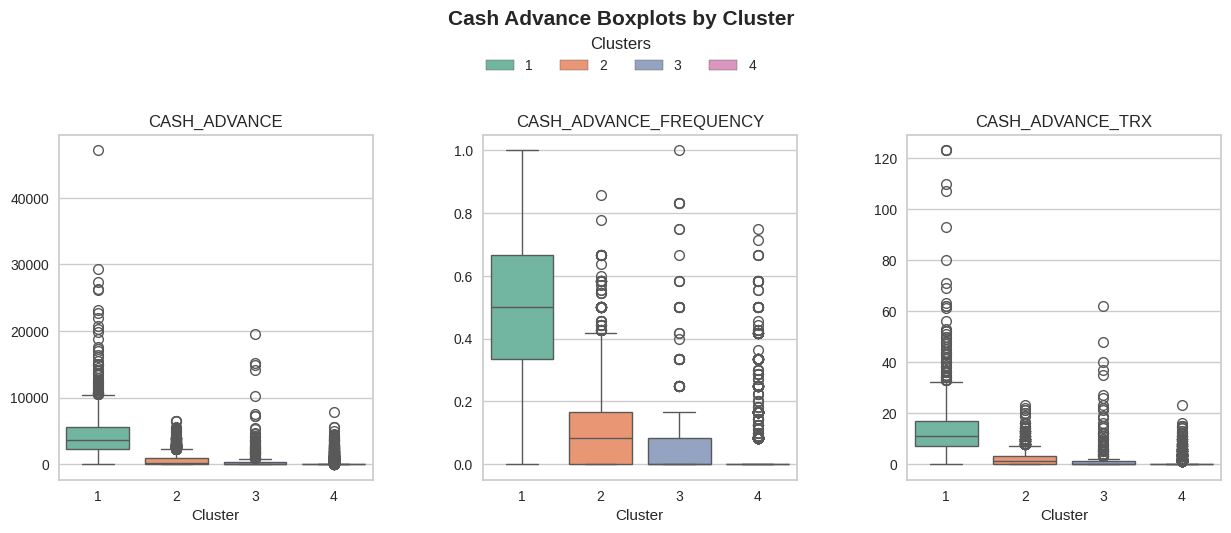

In [44]:
cash_advance_features = ['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY' , 'CASH_ADVANCE_TRX']
feature_boxplots(df, cash_advance_features, 'Cash Advance Boxplots by Cluster')

Cash Advance: Cluster 1 customers tend to pay more in cash advance than other clusters.

Cash Advance Frequency: Cluster 1 customers tend to pay in cah advance more oftern than other customers. Most customers in both clusters 2&3 don't pay in cash advance but still some customers pay in cah advance. Nearly all cluster 4 customers don't pay in cah advance with those who do are outliers.

Cash Advance TRX: Cluster 1 Customer have more cash transactions.

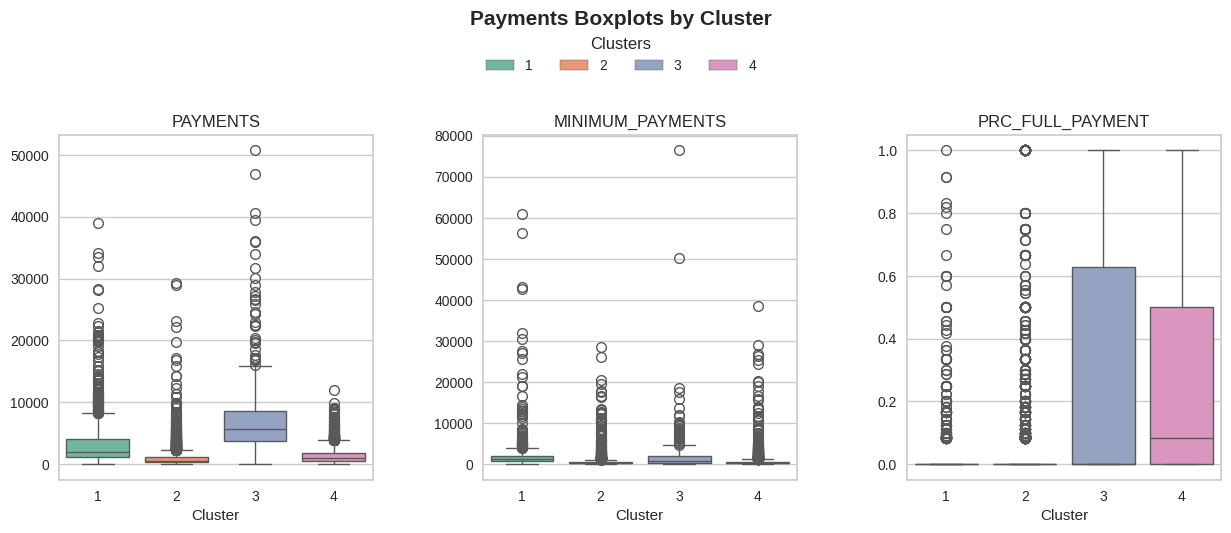

In [45]:
payments_features = ['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
feature_boxplots(df, payments_features, 'Payments Boxplots by Cluster')

Payments: Cluster 3 customers pay more than other clusters, followed by cluster 1 then 4 and lastly 3.

Minimum Payments: All clusters have a low minimum payments including cluster 3 which had highest payments.

PRC Full Payments: While most customers in every cluster have percentage of full payments equal 0, many in clusters 3&4 have a higher percentage of full payments, with those considered outliers in clusters 1&2.

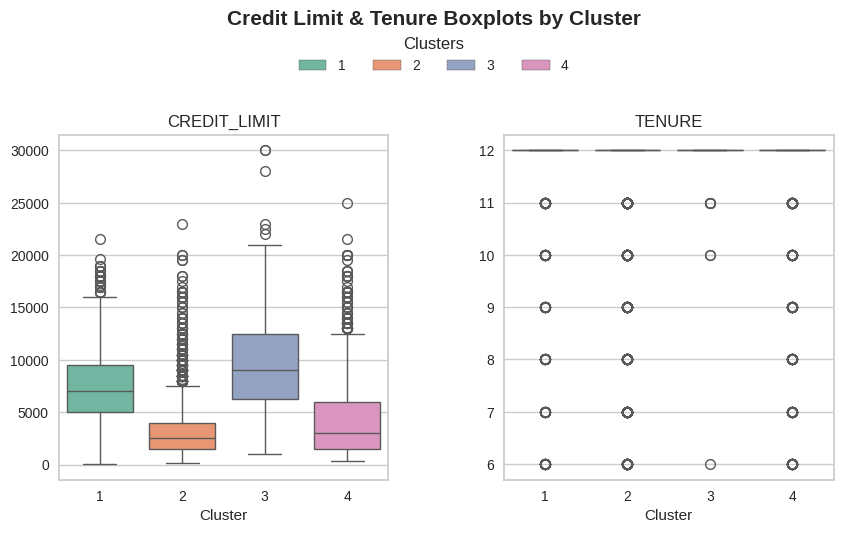

In [46]:
crediti_limit_tenures_features = ['CREDIT_LIMIT', 'TENURE']
feature_boxplots(df, crediti_limit_tenures_features, 'Credit Limit & Tenure Boxplots by Cluster')

Credit Limit: Cluster 3 customers have the highest credit limits with a wide distribution. Cluster 1 follows with relatively high credit limits though with a slightly narrower distribution. Cluster 4 customers have moderate credit limits with limited variation. Cluster 2 has the lowest credit limits and the most concentrated distribution.

Tenure: Vast majority of customers in all
clusters prefer 12 tenure, with those
who don't are outliers.

# Business Insights and Recommendations

## Cluster 1:  High Balance, Cash Oriented Customers
Insights:

These customers are heavily reliant on cash advances. Despite their high balance, having good balance frequency and long tenure, their low purchase frequency and very low full payment rate signal may be using their credit more for emergency needs rather than regular shopping.

Recommendations:
- Introduce programs focused on credit management to reduce reliance on cash advances.
- Introduce rewards for regular purchases to shift behavior from cash advances to spending.

## Cluster 2: Low Engagement, Low Activity Users
Insights:

This group represents inactive or low-engagement users who may be risk-averse, are keeping the card for emergencies or are simply not utilizing their card.

Recommendations:
- Run campaigns on the benefits of credit card usage.
- Engage these users with incentives such as limited-time purchase offers.
- Provide sign-up bonuses or discounts for first-time card users to stimulate initial purchases and build card usage habits.
- Monitor account dormancy and consider downgrade policies for long-term inactivity.

## Cluster 3: High-Spending, Frequent Users Customer
Insights:

These are ideal customers with high activity, high spend, and low risk. They derive great value from their credit card and appear financially disciplined, making them a highly valuable segment.

Recommendations:
- Reward loyalty with premium offers or credit limit enhancements.
- Introduce exclusive reward or cards for consistent purchasing and high spending.
- Engage with personalized communication, promoting new services or offers.


## Cluster 4: Moderate Usage Customers
Insights:
These are financially sound customers who use credit cards regularly and repay reliably. While they aren’t as profitable as the high-value cluster, they represent solid segment with growth potential.

Recommendations:
- Promote upgrades to higher-tier cards.
- Encourage more one-off purchases by offering limited-time rewards or seasonal promotions.
- Create loyalty programs that reward customers for consistent usage.